# **SmartSeq MCF7 Cell Line: ```train``` data**

In this file, we will analyze the ```train``` dataset for the MCF7 cell line with the SmartSeq technique.

## **Python Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import seaborn as sns
import random
import plotly.express as px
from scipy.stats import kurtosis, skew

## **Importing the dataset**


In [3]:
train = pd.read_csv("./MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt", sep=' ')

We take a look at train dataset, to see if we have to perform any changes before starting the algorithmic part.

In [ ]:
train.head()

,output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam,output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam,output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam,output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam,output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam,output.STAR.2_B9_Hypo_S81_Aligned.sortedByCoord.out.bam,output.STAR.2_C10_Hypo_S130_Aligned.sortedByCoord.out.bam,output.STAR.2_C11_Hypo_S131_Aligned.sortedByCoord.out.bam,output.STAR.2_C1_Norm_S103_Aligned.sortedByCoord.out.bam,output.STAR.2_C2_Norm_S104_Aligned.sortedByCoord.out.bam,...,output.STAR.4_H10_Hypo_S382_Aligned.sortedByCoord.out.bam,output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam,output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam,output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam,output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam,output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam
CYP1B1,343,131,452,27,5817,3841,9263,21543,1013,53,...,7890,4512,160,351,327,196,504,34565,20024,5953
CYP1B1-AS1,140,59,203,7,2669,1565,3866,9113,459,22,...,3647,2035,75,138,130,102,238,13717,7835,2367
CYP1A1,0,0,0,0,0,79,238,443,0,0,...,86,1654,0,0,0,1,0,11274,563,522
NDRG1,0,1,0,0,654,1263,2634,540,0,13,...,481,1052,0,0,54,243,62,1263,925,1572
DDIT4,386,289,0,288,2484,2596,1323,2044,36,204,...,3692,2410,800,1,189,266,417,4256,12733,2275


Since we need the genes to be the features, and not the cells, we take the transpose of this dataset.

In [4]:
train = train.transpose()

In [ ]:
train.head()

,CYP1B1,CYP1B1-AS1,CYP1A1,NDRG1,DDIT4,PFKFB3,HK2,AREG,MYBL2,ADM,...,CD27-AS1,DNAI7,MAFG,LZTR1,BCO2,GRIK5,SLC25A27,DENND5A,CDK5R1,FAM13A-AS1
output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam,343,140,0,0,386,75,0,0,476,0,...,63,0,17,59,0,0,0,51,0,0
output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam,131,59,0,1,289,42,0,856,1586,0,...,0,0,1,25,0,0,0,34,0,0
output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam,452,203,0,0,0,0,0,0,775,0,...,15,0,23,0,0,0,0,0,0,0
output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam,27,7,0,0,288,214,15,242,1191,0,...,1,0,3,10,0,0,0,4,0,0
output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam,5817,2669,0,654,2484,1603,748,436,0,0,...,0,0,63,0,0,0,0,60,0,0


In [ ]:
train.describe()

,CYP1B1,CYP1B1-AS1,CYP1A1,NDRG1,DDIT4,PFKFB3,HK2,AREG,MYBL2,ADM,...,CD27-AS1,DNAI7,MAFG,LZTR1,BCO2,GRIK5,SLC25A27,DENND5A,CDK5R1,FAM13A-AS1
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,5454.536000,2258.572000,1604.580000,606.380000,2487.000000,1495.920000,868.424000,308.984000,394.988000,183.096000,...,22.036000,0.192000,50.884000,23.308000,0.192000,0.256000,0.160000,60.536000,2.860000,5.952000
std,8282.337795,3453.650882,5657.397449,766.718881,3422.213185,2109.376474,1837.399974,592.950034,564.259514,470.374582,...,43.250493,2.000787,69.729761,36.415015,1.309195,2.001622,1.167842,75.647093,8.839056,21.649028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,200.750000,85.000000,0.000000,1.000000,96.000000,71.000000,8.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,13.250000,0.000000,0.000000,0.000000,0.000000,11.250000,0.000000,0.000000
50%,795.000000,321.500000,0.000000,222.500000,1198.500000,369.500000,139.500000,18.000000,123.500000,0.000000,...,8.000000,0.000000,37.000000,1.000000,0.000000,0.000000,0.000000,38.500000,0.000000,0.000000
75%,8180.500000,3348.500000,284.500000,1077.500000,3720.000000,2180.750000,1008.000000,371.000000,629.000000,74.500000,...,30.000000,0.000000,63.000000,41.000000,0.000000,0.000000,0.000000,77.000000,0.000000,0.000000
max,44406.000000,17673.000000,58717.000000,3884.000000,21994.000000,12078.000000,16625.000000,3496.000000,3108.000000,3586.000000,...,509.000000,28.000000,816.000000,196.000000,14.000000,26.000000,11.000000,639.000000,62.000000,288.000000


From the description of the training set we see that the data are not standardized. It is not always necessary to standardize the data, but some learning algorithm might require scaled data to perform best. Data with mean 0 and variance 1, moreover, could look better if visualized.

## **Creating the label array**

Since the label array is not directly given we create one. The class of each cell is specified in the name of each cell.

In [5]:
train_label = np.array(train.index.map(lambda x: "Normoxia" if "Norm" in x else "Hypoxia"))

In [ ]:
train_label.shape

(250,)

Now we check how the cell's type are distributed


In [ ]:
np.count_nonzero(train_label == 'Normoxia'), np.count_nonzero(train_label == 'Hypoxia')

(126, 124)

The labels are evenly distributed, so the data is balanced. Having balanced labels makes the supervised training easier, since the algorithm is not biased towords any particular class; this factor potentially gives improved generalization, because we don't risk to overfit to the majority class. More in general, this will help with better visualization and cluster interpretation.


# **EDA**

We now continue with an Exploratory Data Analysis of the dataset. Altough it won't be as extensive as the one brought out on the Unfiltered dataset, it is necessary to understand on what we will work on during the training phase.

In [ ]:
train.shape

(250, 3000)

We now check some basic information about the data

In [ ]:
train.describe().loc["count"].unique()

array([250.])

In [ ]:
train.describe().loc["min"].unique()

array([0.000e+00, 1.200e+01, 3.000e+00, 1.000e+00, 5.010e+02, 3.030e+02,
       4.300e+01, 1.280e+02, 7.900e+01, 6.000e+01, 1.100e+02, 7.850e+02,
       8.700e+01, 9.790e+02, 6.000e+00, 6.800e+01, 1.600e+01, 6.500e+01,
       2.040e+02, 1.300e+01, 9.000e+00, 1.140e+03, 3.330e+02, 5.100e+01,
       2.000e+02, 4.600e+01, 8.600e+01, 9.000e+01, 6.400e+01, 2.640e+02,
       5.300e+01, 1.471e+03, 7.000e+00, 5.000e+00, 1.800e+01, 2.000e+01,
       1.000e+01, 4.000e+00, 2.300e+01, 1.360e+02, 1.880e+02, 8.000e+00,
       2.400e+01, 5.700e+01, 2.700e+01, 1.751e+03, 2.600e+01, 7.800e+01])

In [ ]:
train.isna().sum().sum()

0

From this results is easy to see that there are no cells with missing values and that there are some cells which express all the genes. Altough the latter is true, previous analysis showed that the number of zeros is large, so we will check if this true also for our dataset using a sparsity matrix and sparsity index.



0.6362213333333333


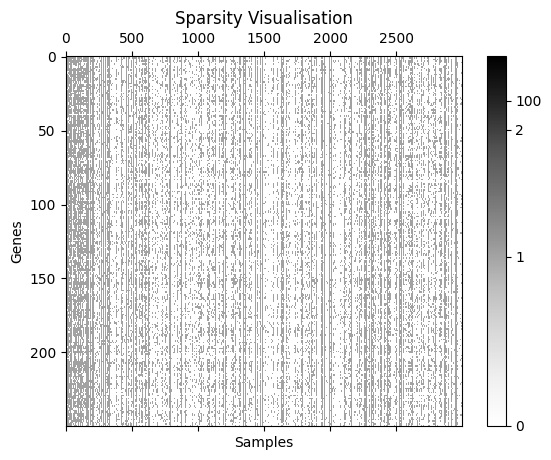

In [ ]:
sparsity_index_train_mcf7 = 1 - (np.count_nonzero(train.values) / train.size)
print(sparsity_index_train_mcf7)


class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, vcenter=None, clip=False):
        self.vcenter = vcenter
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.vcenter, self.vmax], [0, 0.8, 1.]
        return np.ma.masked_array(np.interp(value, x, y,
                                            left=-np.inf, right=np.inf))

    def inverse(self, value):
        y, x = [self.vmin, self.vcenter, self.vmax], [0, 0.8, 1]
        return np.interp(value, x, y, left=-np.inf, right=np.inf)


fig, ax = plt.subplots()
midnorm = MidpointNormalize(vmin=0, vcenter=1.75, vmax=250)

graph_temporary = plt.spy(train, aspect = "auto", norm=midnorm,
                   cmap='Greys') #hsv
plt.colorbar(graph_temporary).set_ticks([0, 1, 2, 100])
plt.grid(False)
plt.xlabel("Samples")
plt.ylabel("Genes")
ax.set_title('Sparsity Visualisation')

plt.show()

The index value is high, that implies a large number of zeros, as predicted.


### **Skewness and Kurtosis**

We check the skweness and kurtosis, in order to see what happened to the given dataset (from unfiltered to this)

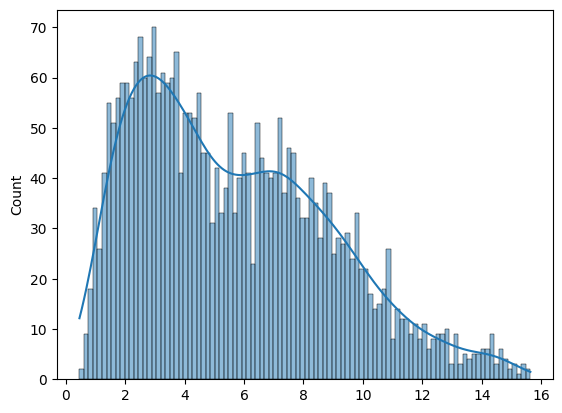

In [ ]:
train_colnames = list(train.columns)
colN = train.shape[1]
train_skew_cells = []

for i in range(colN):
    v_df = train[train_colnames[i]]
    train_skew_cells += [skew(v_df)] 

sns.histplot(train_skew_cells, bins=100, kde=True)
plt.show()

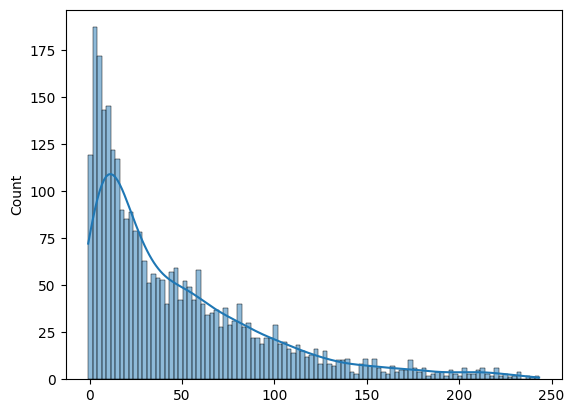

In [ ]:
train_kurtosis_cells = []

for i in range(colN):
    v_df = train[train_colnames[i]]
    train_kurtosis_cells += [kurtosis(v_df)]

sns.histplot(train_kurtosis_cells, bins=100, kde=True)
plt.show()

We see that the data is both an high skweness value and an high kurtosis value

### **Gene Expression**

In [ ]:
min_expressed_gene = train.sum(axis = 0).idxmin()
print("Least expressed gene: {}\nNumber of codifying samples: {}".format(min_expressed_gene, train.sum(axis = 0)[min_expressed_gene]))

max_expressed_gene = train.sum(axis = 0).idxmax()
print("\nMost expressed gene: {}\nNumber of codifying samples: {}".format(max_expressed_gene, train.sum(axis = 0)[max_expressed_gene]))

min_expressed_cell = train.sum(axis = 1).idxmin()
print("\nLeast expressed cell: {}\nProduced genes:{}\nUnique genes:{}\n".format(min_expressed_cell, train.sum(axis = 1)[min_expressed_cell], train.astype(bool).sum(axis = 0).min()))

max_expressed_cell = train.sum(axis = 1).idxmax()
print("Most expressed cell: {}\nProduced genes:{}\nUnique genes:{}".format(max_expressed_cell, train.sum(axis = 1)[max_expressed_cell], train.astype(bool).sum(axis = 0).max()))

Least expressed gene: ZBTB7C
Number of codifying samples: 15

Most expressed gene: GAPDH
Number of codifying samples: 6826720

Least expressed cell: output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam
Produced genes:222421
Unique genes:2

Most expressed cell: output.STAR.4_A11_Hypo_S47_Aligned.sortedByCoord.out.bam
Produced genes:537979
Unique genes:250


We see that the least express gene is ZBTB7C, which, between other things, is a tumor suppressor gene (TSG). TSGs regulate the cell during the division and replication phase of the cell cycle ensuring that it doesn't grow uncontrollably, resulting in a tumor; this type of genes are thus involved in negative regularization of cell proliferation. From this description we hypotize that this gene is present only in normoxic cells. 

In [ ]:
ZBTB7C_cells = train[train["ZBTB7C"] != 0]
list(ZBTB7C_cells.index)

['output.STAR.2_H6_Norm_S348_Aligned.sortedByCoord.out.bam',
 'output.STAR.4_E5_Norm_S215_Aligned.sortedByCoord.out.bam',
 'output.STAR.4_E6_Norm_S216_Aligned.sortedByCoord.out.bam']

As predicted, the only three cells which express this gene are under normoxia. 

Now we take a look at the most expressed gene: GAPDH. This gene encodes a member of the glyceraldehyde-3-phosphate dehydrogenase protein family, which is a moonlighting protein (a protein with different functions). This enzyme plays a crucial role in the glycolytic pathway, which is responsible for glucose metabolism. It has a variety of functions, as catalyzer and DNA activity in the nucleus, together with antimicrobial activity. We are not surprised to find out that this is the most expressed gene, since it is fundamental to carry out basic cell metabolism. Moreover, it is found in almost all living organisms. 

Multiple studies have analyzed the relation between cancer cells and GAPDH status. One of the most common result is that the expression status of this enzyme is deregulated in cancer cells. The information that we found to be the most relevant, was that hypoxia inducible factor-1 (HIF-1) (which is a cancer-related factor), modulates this gene expression and protein functions. The aforementioned factor will be described later in pathways analysis. 

Other studies on colon cancer cells suggest the possible role of GAPDH in metastatis promotion of cancerogenic cells. 

#### **Distribution**

We now check the distribution of the entire matrix

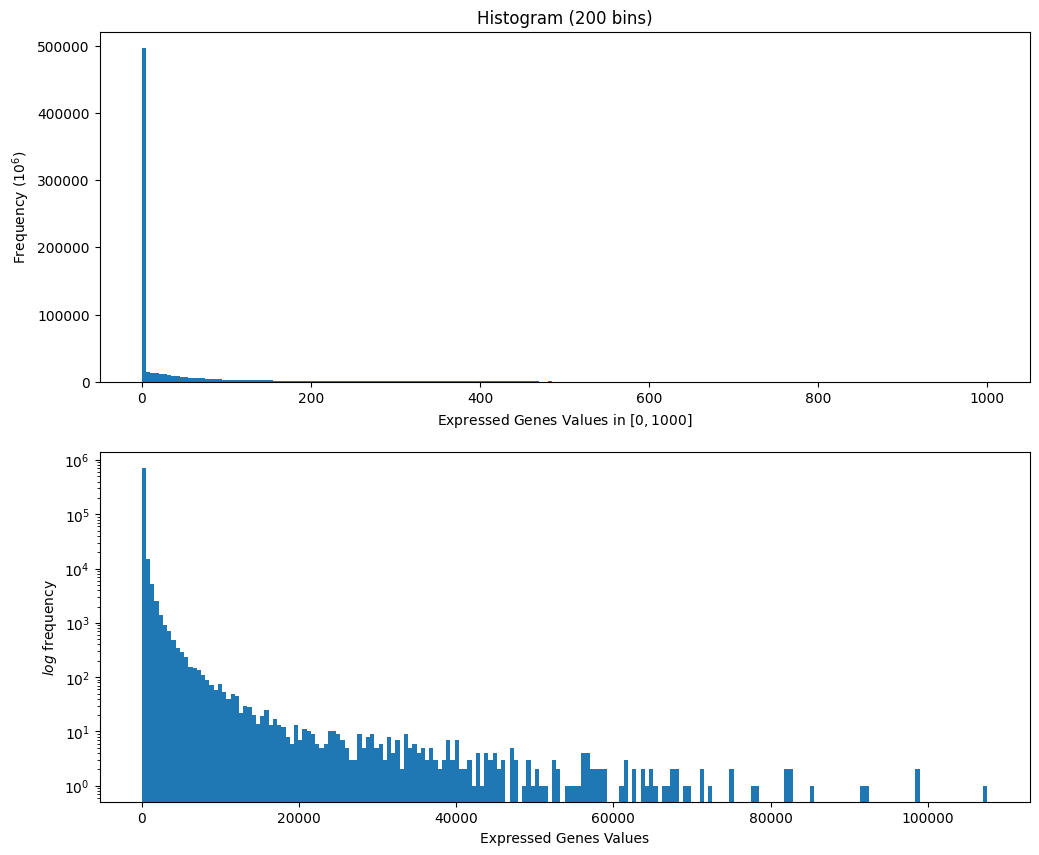

In [ ]:
train_flattened = pd.Series(train.values.flatten())
fig, ax = plt.subplots(2, 1, figsize=(12, 10)) 
ax[0].hist(train_flattened, range = [0, 1000], bins = 200)
ax[0].set_xlabel("Expressed Genes Values in $[0, 1000]$")
ax[0].set_ylabel("Frequency ($10^6$)")
ax[0].set_title("Histogram (200 bins)")

ax[1].hist(train_flattened, bins = 200, log = True)
ax[1].set_xlabel("Expressed Genes Values")
ax[1].set_ylabel("$log$ frequency")
plt.show()

From the last graph we see that the frequency of zeros is really high, as a consequence of high sparsity, and that the frequency decreases fastly with the number of expressed genes

Now, we divide the hypoxic and normoix cells, in order to see how gene expression distribution changes between them. 

In [ ]:
train_init = train.transpose()
normoxic_cells = train_init.columns.str.contains('Norm')
hypoxic_cells = train_init.columns.str.contains('Hypo')
norm_hypo_cells = pd.Series({"Normoxic" : normoxic_cells, "Hypoxic" : hypoxic_cells})

In [ ]:
codified_genes_normoxia = np.count_nonzero(train_init.loc[:, normoxic_cells].values)
codified_genes_hypoxia = np.count_nonzero(train_init.loc[:, hypoxic_cells].values)
print("Codified genes in normoxic cells: ", codified_genes_normoxia)
print("Codified genes in hypoxic cells: ", codified_genes_hypoxia)

Codified genes in normoxic cells:  148449
Codified genes in hypoxic cells:  124385


So, normoxic cells express approximately 20000 genes more than hypoxic cells

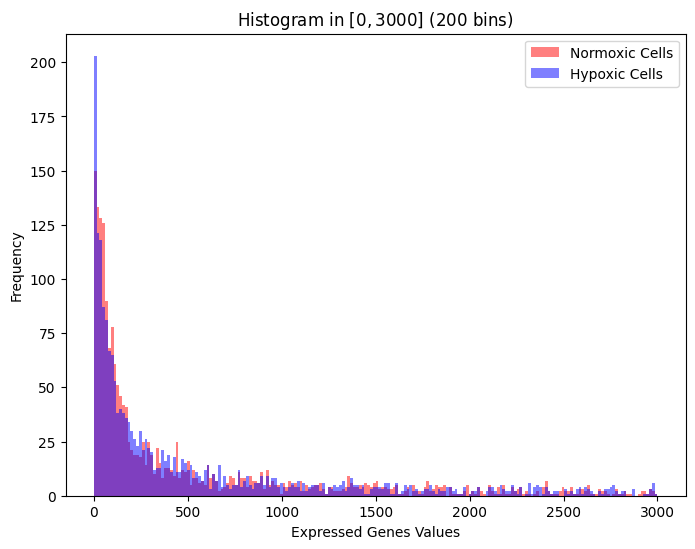

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6)) 
ax.hist(train_init.loc[:, normoxic_cells].sum(axis = 1), range = [0, 3000], bins = 200, alpha = 0.5, color = "red", label = "Normoxic Cells")
ax.hist(train_init.loc[:, hypoxic_cells].sum(axis = 1), range = [0, 3000], bins = 200, alpha = 0.5, color = "blue", label = "Hypoxic Cells")
ax.set_xlabel("Expressed Genes Values")
ax.set_ylabel("Frequency")
ax.set_title("Histogram in $[0, 3000]$ (200 bins)")
ax.legend()
plt.show()

From this plot we can see graphically what we have seen numerically before, id est, that hypoxic cells have a larger frequency of inexpressed genes.

Now that we have a general idea on how is the data, we can start visualizing it using dimensionality reduction methods

## **Dimensionality reduction**

In this section we explore different methods to approach dimensionality reduction. These tecniques will be fundamental to visualize clusters later on.

### **Scaling**

As we have seen in the exploratory data analysis, the data are not standardized, so we will do it now to have a better visualization of the data. 

For all the dimensionality reduction methods that we adopted, we also tried to not scale the data, but found that a scaled representation was more easily interpretable.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
train_scaled = pd.DataFrame(StandardScaler().fit_transform(train), columns=train.columns)

Moreover, we create a single data frame containing also the label array

In [ ]:
complete_train = train.copy()
complete_train['Label'] = train_label
complete_train

,CYP1B1,CYP1B1-AS1,CYP1A1,NDRG1,DDIT4,PFKFB3,HK2,AREG,MYBL2,ADM,...,DNAI7,MAFG,LZTR1,BCO2,GRIK5,SLC25A27,DENND5A,CDK5R1,FAM13A-AS1,Label
output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam,343,140,0,0,386,75,0,0,476,0,...,0,17,59,0,0,0,51,0,0,Normoxia
output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam,131,59,0,1,289,42,0,856,1586,0,...,0,1,25,0,0,0,34,0,0,Normoxia
output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam,452,203,0,0,0,0,0,0,775,0,...,0,23,0,0,0,0,0,0,0,Normoxia
output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam,27,7,0,0,288,214,15,242,1191,0,...,0,3,10,0,0,0,4,0,0,Normoxia
output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam,5817,2669,0,654,2484,1603,748,436,0,0,...,0,63,0,0,0,0,60,0,0,Hypoxia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,196,102,1,243,266,278,78,1,199,0,...,0,1,0,0,0,0,45,19,0,Normoxia
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,504,238,0,62,417,932,275,0,33,0,...,0,0,0,0,0,0,0,0,0,Normoxia
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,34565,13717,11274,1263,4256,5663,701,0,0,0,...,0,45,0,0,0,0,140,0,32,Hypoxia
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,20024,7835,563,925,12733,2187,1141,0,20,81,...,0,57,8,0,0,0,7,0,11,Hypoxia


### **PCA**

In [ ]:
# ! pip install umap-learn

In [9]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

In [ ]:
colors1 = train.sum(axis=1)
cmap = {'Hypoxia': 'red', 'Normoxia': 'blue'}
colors2 = [cmap[cell_type] for cell_type in complete_train.Label]


def plot_dim_red(dim_type, df, ax1, ax2, ax3):
  fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(17.5, 11))

  plt.suptitle(f"{dim_type} Visualization")

  # counts per cell - 2D
  sctr2d = axs[0, 0].scatter(df[:, 0], df[:, 1], c=colors1)
  axs[0, 0].set_xlabel(ax1)
  axs[0, 0].set_ylabel(ax2)
  axs[0, 0].grid(True)
  if dim_type == "PCA":
    axs[0, 0].set_title(f"Explained Variance:{round(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1], 2)}")

  # counts per cell - 3D
  axs[0, 1].remove()
  axs[0, 1] = fig.add_subplot(222, projection='3d')
  sctr3d = axs[0, 1].scatter(df[:, 0], df[:, 1], df[:, 2], c=colors1)
  axs[0, 1].set_xlabel(ax1)
  axs[0, 1].set_ylabel(ax2)
  axs[0, 1].set_zlabel(ax3)
  if dim_type == "PCA":
    axs[0, 1].set_title(f"Explained Variance:{round(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] + pca.explained_variance_ratio_[2], 2)}")
  fig.colorbar(sctr3d, ax=axs[0, 1], label="Counts per cell")

  # hypoxia normoxia - 2D
  sctr2d = axs[1, 0].scatter(df[:, 0], df[:, 1], c=colors2)
  axs[1, 0].set_xlabel(ax1)
  axs[1, 0].set_ylabel(ax2)
  axs[1, 0].grid(True)
  handles = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=val, label=key)[0] for key, val in cmap.items()]
  axs[1, 0].legend(handles=handles, numpoints=1, loc='lower right')

  # hypoxia normoxia - 3D
  axs[1, 1].remove()
  axs[1, 1] = fig.add_subplot(224, projection='3d')
  sctr3d = axs[1, 1].scatter(df[:, 0], df[:, 1], df[:, 2], c=colors2)
  axs[1, 1].set_xlabel(ax1)
  axs[1, 1].set_ylabel(ax2)
  axs[1, 1].set_zlabel(ax3)

  plt.tight_layout()


In [ ]:
train_pca = pca.fit_transform(train_scaled)

We now plot both a 2D and a 3D representation of the data point, first with colors mapping the count of genes expressed per cell and secondly with a color distinction for cell class

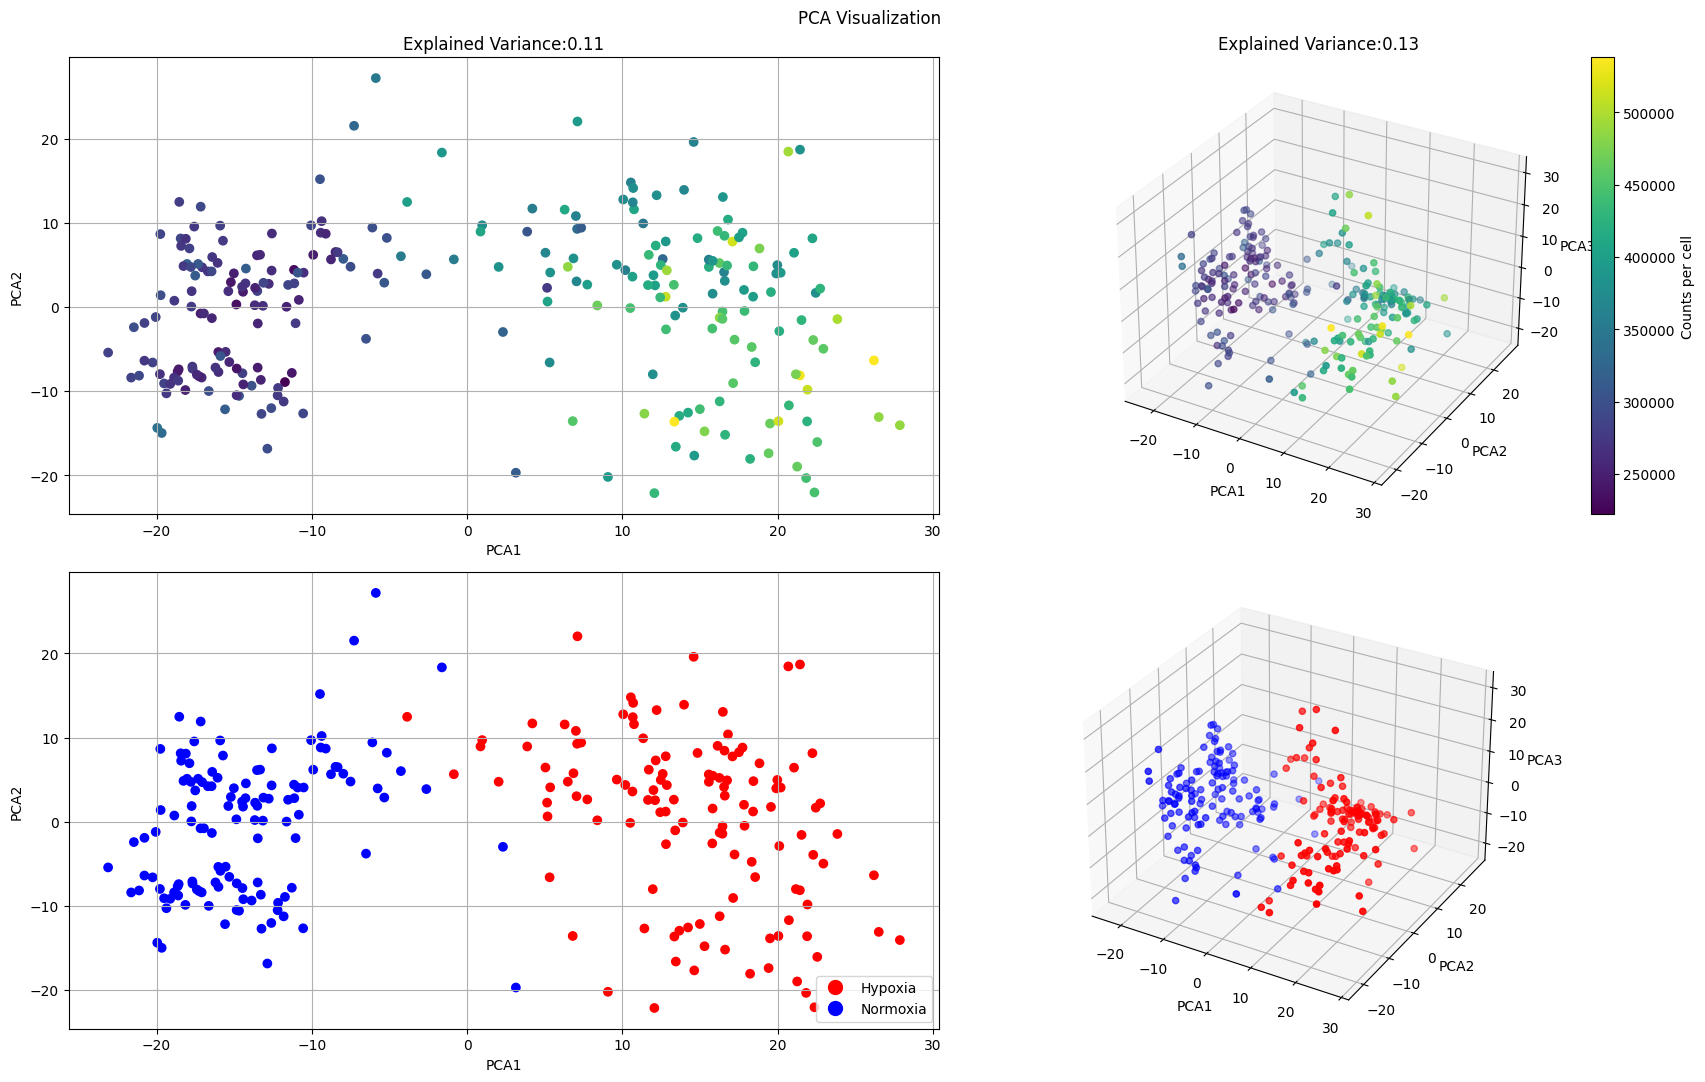

In [ ]:
plot_dim_red("PCA", train_pca, "PCA1", "PCA2", "PCA3")
plt.show()

Althought the explained variance is low, we can very clearly see a distinction between the two cell classes. Normoxic cells have a higher gene count (as previously seen) in respect to the hypoxic cells. In addition, hypoxic cells seem to be slightly more spread apart.

In this case we plotted the scaled data, but we also tried to do it with the non-standardized dataset. What is clearly visible is that normoxic cells are concentrated very close one to another and that there is an obvious line (or plane in 3D) which divides almost perfectly the two cell classes (taking in consideration a few outliers). 

### **tSNE**

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components = 3, perplexity=60, random_state = 42)
train_tsne = tsne.fit_transform(train_scaled)

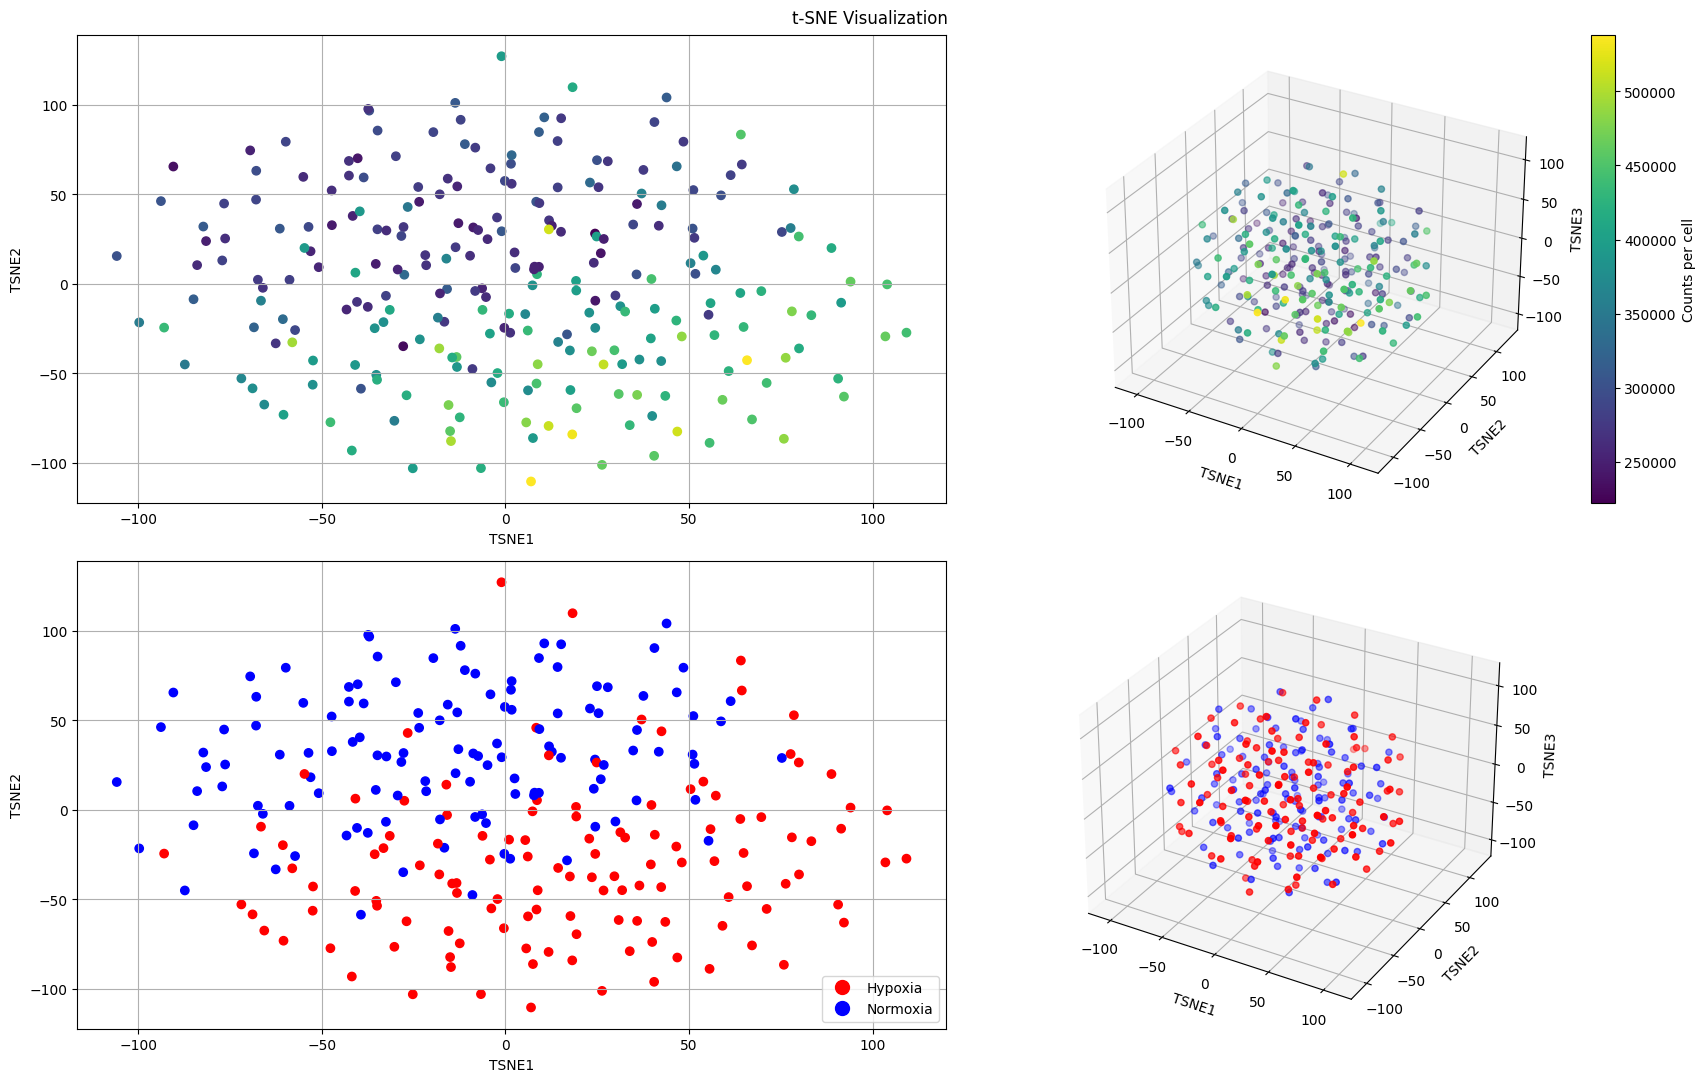

In [ ]:
plot_dim_red("t-SNE", train_tsne, "TSNE1", "TSNE2", "TSNE3")
plt.show()

The representation using tSNE doesn't give us much information about the separation between hypoxic and normoxic cells. Notice that the two cells that are far from the big cluster are not necessarly outliers, since in using this dimensionality reduction method, distances are not indicativel

### **UMAP**

In [ ]:
import umap.umap_ as umap

ModuleNotFoundError: ignored

In [ ]:
reducer = umap.UMAP(n_components=3)
train_umap = reducer.fit_transform(train_scaled)

In [ ]:
plot_dim_red("UMAP", train_umap, "UMAP1", "UMAP2", "UMAP3")
plt.show()

This representatio seems to be very similar to the one achieved through PCA, since there is a clear separation between the two cell classes.

After this analysis on dimensionality reduction tecniques, in the future, we will probabily use PCA, since it is the fastest and the one with clearer and easier interpretation on this dataset.

# **Unsupervised clustering**

For the unsupervised training part, we only focus on clustering to check if the dataset is divided in two clear *sections* or if more can be found. In general, as we have seen in the Dimensionality reduction section, we will use standardized data.

## **Clustering**

### **KMeans**

We start with kmeans algorithm, which is usefull to visualize exclusive clusters.

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Since the number of clusters is an hyperparamter, we check with the elbow method which is the optimal k.

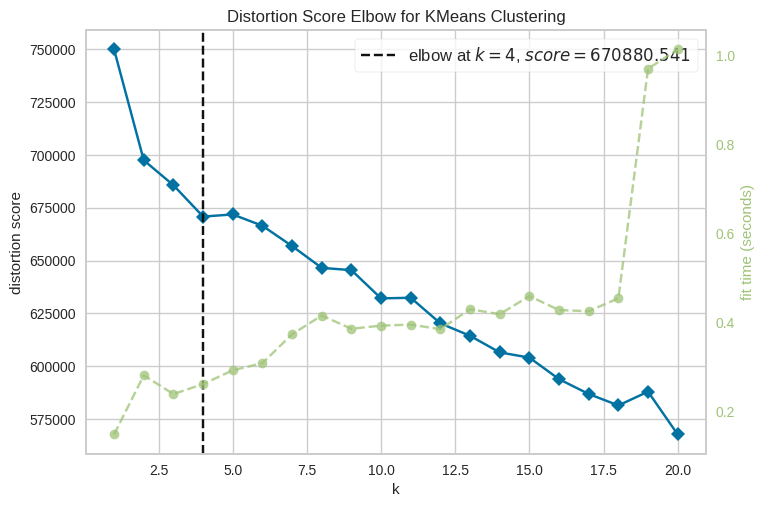

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(1,21), timings= True, random_state=42)
visualizer.fit(train_scaled)
visualizer.show()

We cannot see a clear elbow, even though the algorithm finds one analytically. We try to run it with k=4.

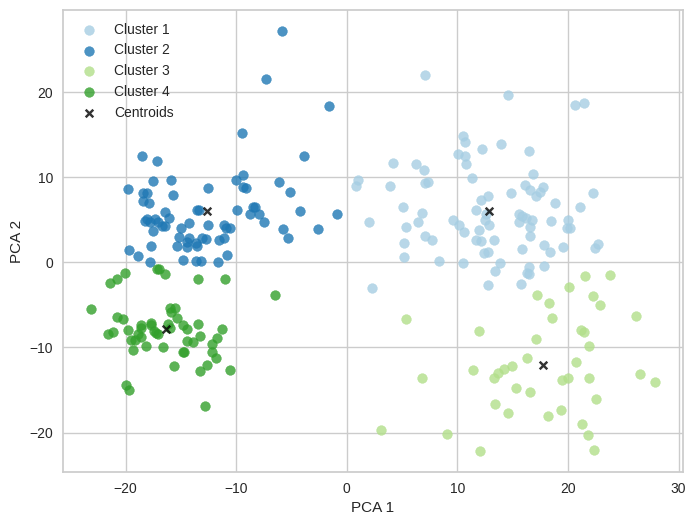

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

pca = PCA(n_components=2)

PCA_components = pca.fit_transform(train_scaled)
kmeans.fit(PCA_components)
cluster_labels = kmeans.predict(PCA_components)

centroids = kmeans.cluster_centers_
train_scaled['cluster'] = cluster_labels
fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("Paired", n_colors=4)

for i in range(4):
    ax.scatter(PCA_components[train_scaled['cluster']==i, 0], PCA_components[train_scaled['cluster']==i, 1], alpha=0.8, label='Cluster '+str(i+1), color=colors[i])

ax.scatter(centroids[:,0], centroids[:,1], marker='x', s=30, color='black', alpha = 0.8, label='Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
ax.legend()
plt.show()


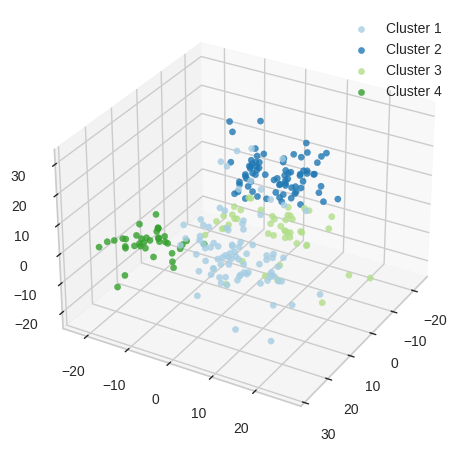

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

pca = PCA(n_components=3) 
PCA_components = pca.fit_transform(train_scaled)
kmeans.fit(PCA_components)
cluster_labels = kmeans.predict(PCA_components)
train_scaled['cluster'] = cluster_labels

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = sns.color_palette("Paired", n_colors=5)

for i in range(4):
    ax.scatter(PCA_components[train_scaled['cluster']==i, 0], PCA_components[train_scaled['cluster']==i, 1], PCA_components[train_scaled['cluster']==i, 2], alpha=0.8, label='Cluster '+str(i+1), color=colors[i])

ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           kmeans.cluster_centers_[:,2], s = 30, c = 'black',
           marker='x', label = 'Centroids')
ax.legend()
ax.view_init(azim=30, elev=30)

plt.show()

Plot with k = 2, which is a great way to check if the clusters that kmeans finds are associated to the label of the cells

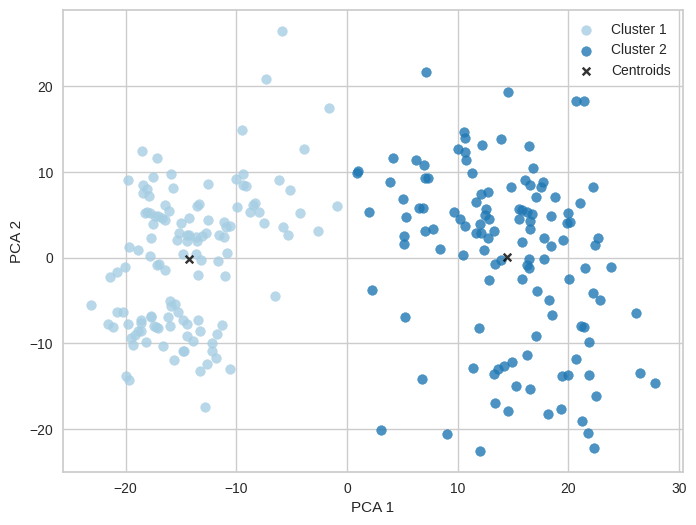

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
pca = PCA(n_components=2)
PCA_components = pca.fit_transform(train_scaled)
kmeans.fit(PCA_components)
cluster_labels = kmeans.predict(PCA_components)

centroids = kmeans.cluster_centers_
train_scaled['cluster'] = cluster_labels
fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("Paired", n_colors=5)

for i in range(2):
    ax.scatter(PCA_components[train_scaled['cluster']==i, 0], PCA_components[train_scaled['cluster']==i, 1], alpha=0.8, label='Cluster '+str(i+1), color=colors[i])

ax.scatter(centroids[:,0], centroids[:,1], marker='x', s=30, color='black', alpha = 0.8, label='Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
ax.legend()
plt.show()

This has a very high resemblance with what we have previously seen with PCA (second plot, with the separation between normoxic and hypoxic cells). This suggests that the spacial characteristics of the data points are well enough distributed for a clustering algorithm to separe the cells in normoxia and the ones in hypoxia

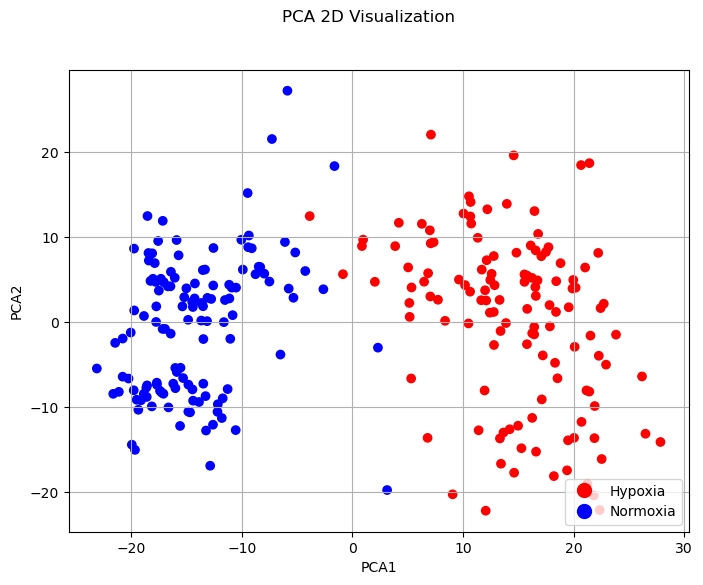

In [ ]:
cmap = {'Hypoxia': 'red', 'Normoxia': 'blue'}
colors = [cmap[cell_type] for cell_type in complete_train.Label]

fig, ax = plt.subplots(figsize=(8, 6))

plt.suptitle("PCA 2D Visualization")

sctr2d = ax.scatter(train_pca[:, 0], train_pca[:, 1], c=colors)
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.grid(True)
handles = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=val, label=key)[0] for key, val in cmap.items()]
ax.legend(handles=handles, numpoints=1, loc='lower right')

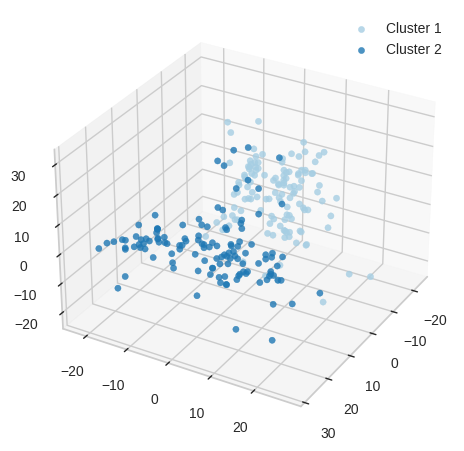

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
pca = PCA(n_components=3)
PCA_components = pca.fit_transform(train_scaled)
kmeans.fit(PCA_components)
cluster_labels = kmeans.predict(PCA_components)
train_scaled['cluster'] = cluster_labels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = sns.color_palette("Paired", n_colors=5)

for i in range(2):
    ax.scatter(PCA_components[train_scaled['cluster']==i, 0], PCA_components[train_scaled['cluster']==i, 1], PCA_components[train_scaled['cluster']==i, 2], alpha=0.8, label='Cluster '+str(i+1), color=colors[i])

ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           kmeans.cluster_centers_[:,2], s = 30, c = 'black',
           marker='x', label = 'Centroids')
ax.legend()
ax.view_init(azim=30, elev=30)

plt.show()

### **Hierarchical Clustering**

Now, we will use hierarchical clustering to check if a different clustering method finds the same type of clusters as kmeans. Moreover the dendogram representation could be useful to identify outliers.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Now we plot the dendograms of the clusters obtained using different linkage methods.

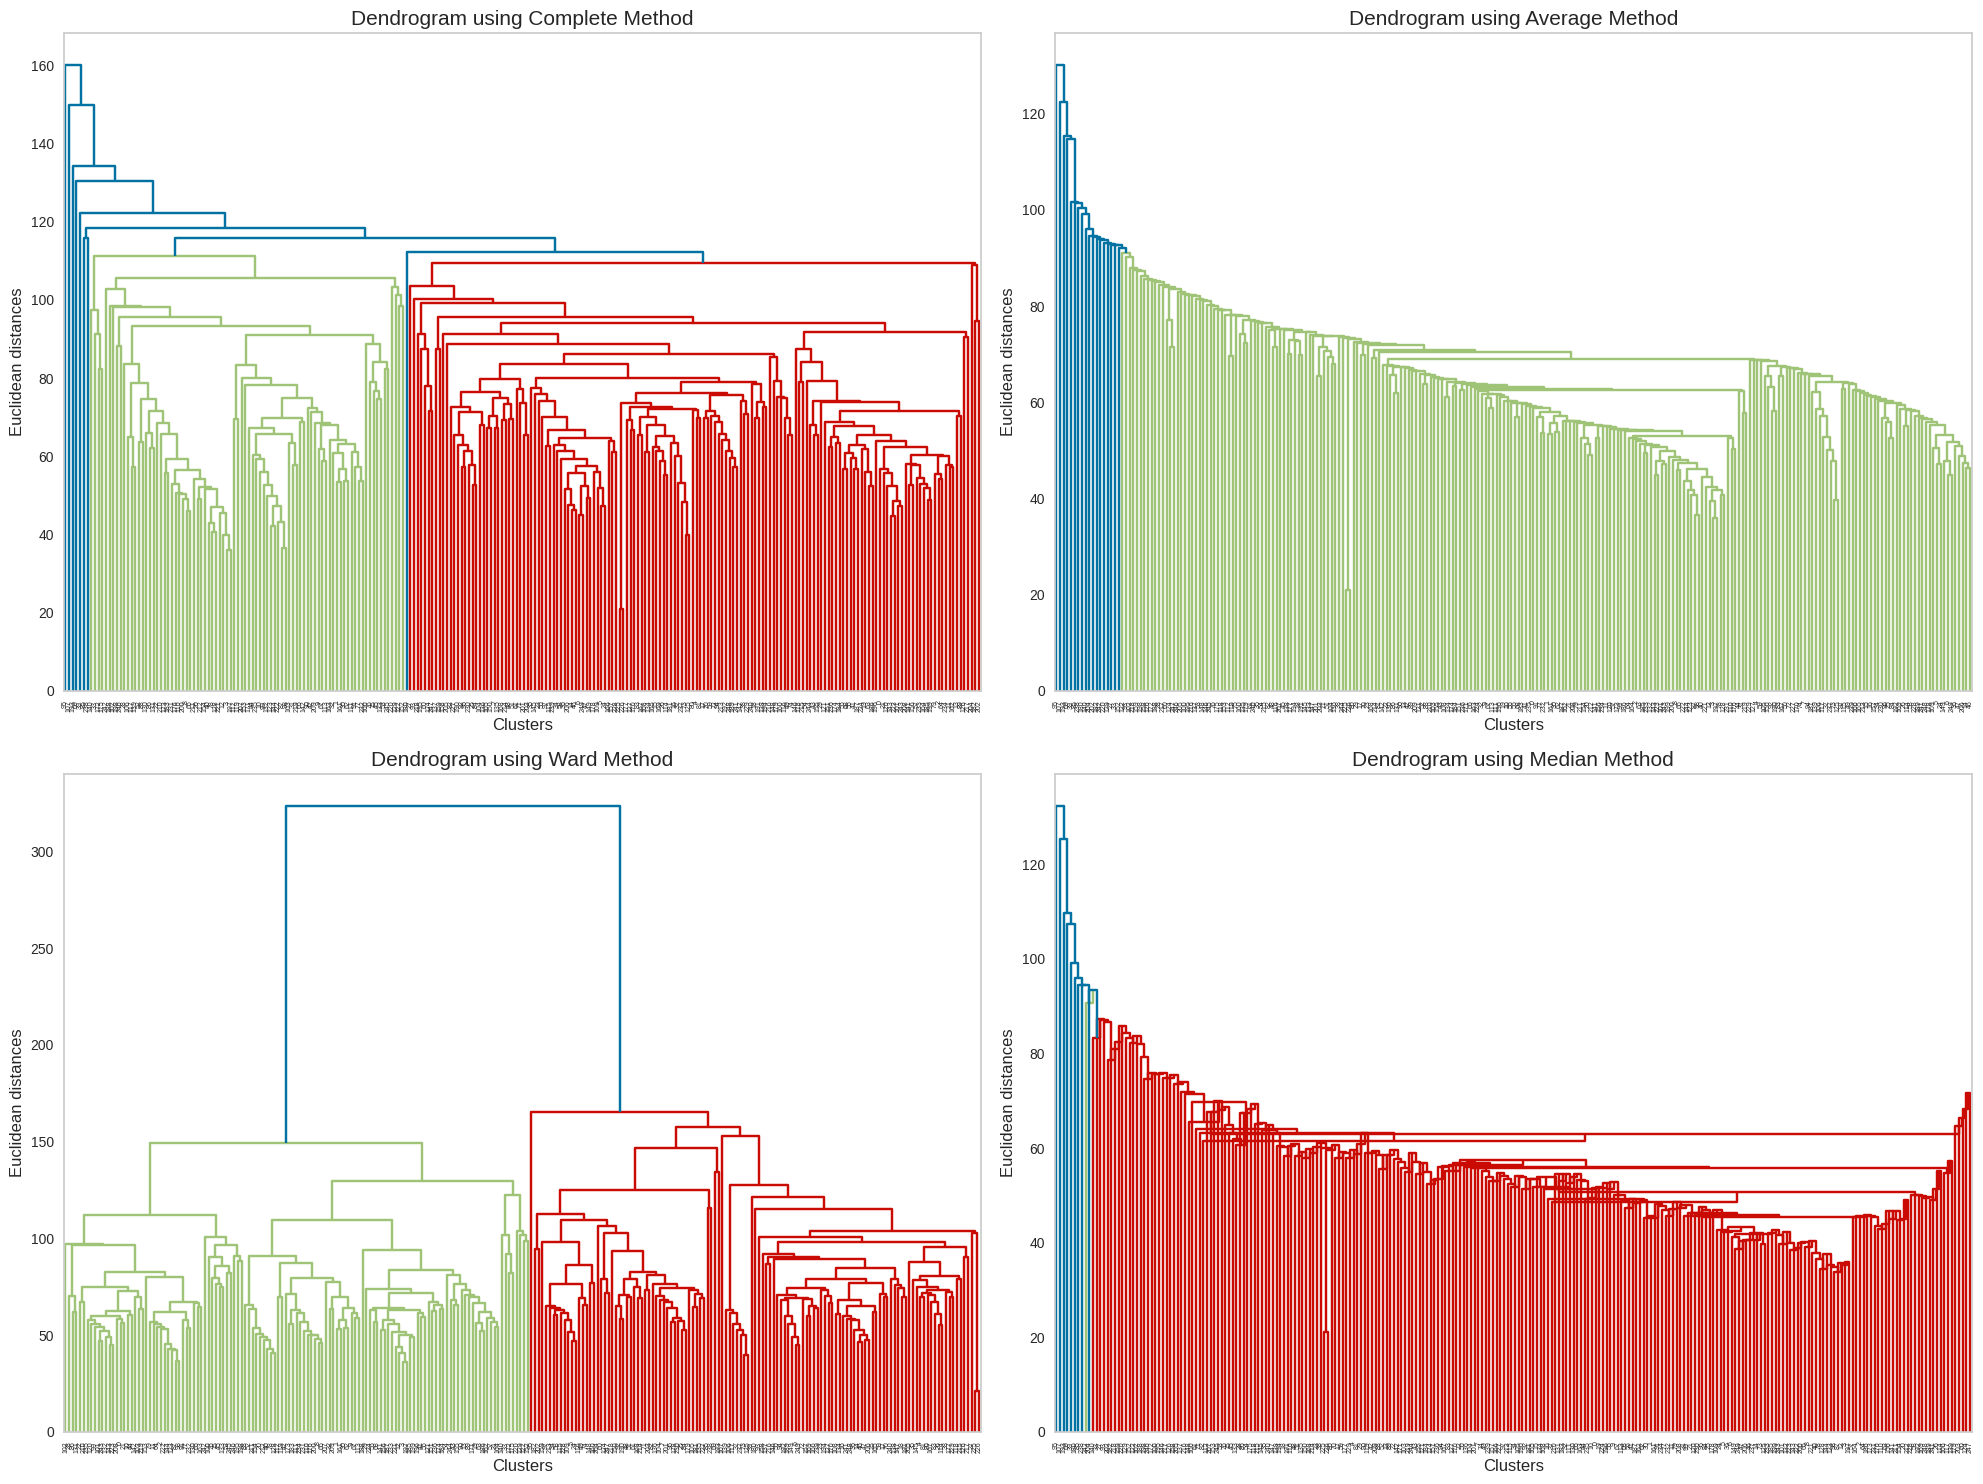

In [ ]:
linkage_methods = ['complete', 'average', 'ward', 'median']
fig, axs = plt.subplots(len(linkage_methods)//2, 2, figsize=(20, 15))
for i, method in enumerate(linkage_methods):
    row = i // 2
    col = i % 2
    dend = dendrogram(linkage(train_scaled, method=method), ax=axs[row, col])
    axs[row, col].set_title(f"Dendrogram using {method.capitalize()} Method", fontsize=15)
    axs[row, col].set_xlabel('Clusters', fontsize=12)
    axs[row, col].set_ylabel('Euclidean distances', fontsize=12)
    axs[row, col].grid(False)

fig.tight_layout()
plt.show()

It is obvious that the Ward method is the one the resembles the most what we achieved with kmeans, since we have two perfectly divided clusters. Average method and Median method find a single cluster and some outliers, so these visualization will be discarded. It is interesting to take a look at compelte-linkage, which gives two clusters and some outliers. 

Notice that also other linkage methods were used, but discarded, since didn't produce anything interesting.

### Leiden Clustering

In [ ]:
!pip install scanpy
import scanpy as sc
sc.settings.verbosity = 0
leiden = train
adata = sc.AnnData(leiden.copy())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True, percent_top=[20], log1p=True)
sc.pp.scale(adata)
sc.pp.pca(adata, svd_solver="arpack", n_comps = 249) # same plot as before
sc.pp.neighbors(adata, n_pcs = 205) # computes the KNN graph on the lower-dim space on 265 components (95% variance)

In [ ]:
!pip install leidenalg
sc.tl.leiden(adata, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata, key_added="leiden_res0_6", resolution=0.6)
sc.tl.leiden(adata, key_added="leiden_res0_75", resolution=0.75)
sc.tl.leiden(adata, key_added="leiden_res0_8", resolution=0.8)
sc.tl.leiden(adata, key_added="leiden_res0_9", resolution=0.9)
sc.tl.leiden(adata, key_added="leiden_res1", resolution=1.0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


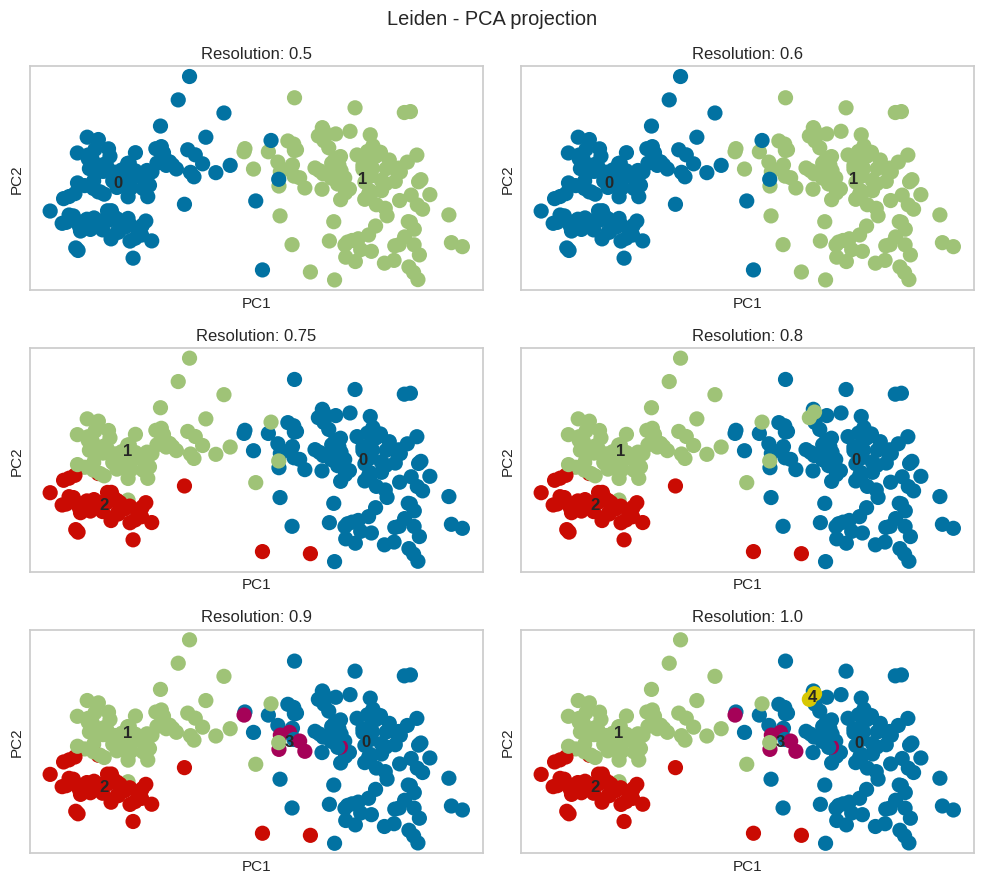

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10, 9))
plt.suptitle("Leiden - PCA projection")

sc.pl.pca(adata, color="leiden_res0_5", legend_loc="on data", ax=axs[0, 0], show=False)
axs[0, 0].set_title("Resolution: 0.5")

sc.pl.pca(adata, color="leiden_res0_6", legend_loc="on data", ax=axs[0, 1], show=False)
axs[0, 1].set_title("Resolution: 0.6")

sc.pl.pca(adata, color="leiden_res0_75", legend_loc="on data", ax=axs[1, 0], show=False)
axs[1, 0].set_title("Resolution: 0.75")

sc.pl.pca(adata, color="leiden_res0_8", legend_loc="on data", ax=axs[1, 1], show=False)
axs[1, 1].set_title("Resolution: 0.8")

sc.pl.pca(adata, color="leiden_res0_9", legend_loc="on data", ax=axs[2, 0], show=False)
axs[2, 0].set_title("Resolution: 0.9")

sc.pl.pca(adata, color="leiden_res1", legend_loc="on data", ax=axs[2, 1], show=False)
axs[2, 1].set_title("Resolution: 1.0")

plt.tight_layout()
plt.show()

In [ ]:
cluster_assignments = adata.obs['leiden_res0_6']
print(cluster_assignments[:10])


output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam      0
output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam      0
output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam      0
output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam      0
output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam      1
output.STAR.2_B9_Hypo_S81_Aligned.sortedByCoord.out.bam      1
output.STAR.2_C10_Hypo_S130_Aligned.sortedByCoord.out.bam    1
output.STAR.2_C11_Hypo_S131_Aligned.sortedByCoord.out.bam    1
output.STAR.2_C1_Norm_S103_Aligned.sortedByCoord.out.bam     0
output.STAR.2_C2_Norm_S104_Aligned.sortedByCoord.out.bam     0
Name: leiden_res0_6, dtype: category
Categories (2, object): ['0', '1']


In [ ]:
train_label_int = np.array(leiden.index.map(lambda x: "1" if "Norm" in x else "0"))

In [ ]:
correct_pred = 0
for i in range(len(cluster_assignments)):
    if cluster_assignments[i] == train_label_int[i]:
        correct_pred += 1


In [ ]:
print(f'Correct Predictions are: {correct_pred}')
print(f'percentage of correct predictions over the whole dataset is: {round((correct_pred/250)*100)}%')

Correct Predictions are: 194
percentage of correct predictions over the whole dataset is: 78%


### **Other clustering techniques**

Among the experimented clustering methods there is also DBSCAN, but we found out that it is not effective since it found two clusters with one of the two with just four elements. One of the reasons for this could be the fact that this algorithm searches for continuous regions of high densitity data and that we don't have this predisposition in our dataset

### Gene annotation

In [ ]:
train_0 = pd.read_csv("./MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt", sep=' ')

In [ ]:
print(pd.DataFrame({'gene': train_0.idxmax(), 'value': train_0.max()}))
print("Uniques[{}]: {}".format(train_0.idxmax().unique().size, train_0.idxmax().unique()))

                                                      gene  value
output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord...   GAPDH   8222
output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord...   ACTG1  10167
output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord...  MT-CO1  11446
output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord...   GAPDH  10312
output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord...   GAPDH  30586
...                                                    ...    ...
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoor...   GAPDH  16625
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoor...   GAPDH  29663
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoor...  CYP1B1  34565
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoor...   GAPDH  34175
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoor...   GAPDH  57814

[250 rows x 2 columns]
Uniques[13]: ['GAPDH' 'ACTG1' 'MT-CO1' 'ALDOA' 'SULF2' 'CYP1B1' 'TFF1' 'FTH1' 'CYP1A1'
 'MT-CYB' 'FOS' 'ISG15' 'CTSD']


In [ ]:
print("Top 5 genes of normoxic cells:\n", train_0.loc[:, normoxic_cells].sum(axis = 1).nlargest(5))
print("Top 5 genes of hypoxic cells:\n", train_0.loc[:, hypoxic_cells].sum(axis = 1).nlargest(5))

Top 5 genes of normoxic cells:
 MT-CO1    1130501
GAPDH     1086508
ALDOA      665312
ACTG1      657445
MT-CYB     638131
dtype: int64
Top 5 genes of hypoxic cells:
 GAPDH     5740212
ACTG1     3337504
ALDOA     3253186
FTH1      1359830
CYP1B1    1326328
dtype: int64


In [ ]:
marker_genes = {
    # These ones are standard
    "CD14+ Mono": ["FCN1", "CD14"],
    "CD16+ Mono": ["TCF7L2", "FCGR3A", "LYN"],
    "ID2-hi myeloid prog": [
        "CD14",
        "ID2",
        "VCAN",
        "S100A9",
        "CLEC12A",
        "KLF4",
        "PLAUR",
    ],
    "cDC1": ["CLEC9A", "CADM1"],
    "cDC2": [
        "CST3",
        "COTL1",
        "LYZ",
        "DMXL2",
        "CLEC10A",
        "FCER1A",
    ],  # Note: DMXL2 should be negative
    "Normoblast": ["SLC4A1", "SLC25A37", "HBB", "HBA2", "HBA1", "TFRC"],
    "Erythroblast": ["MKI67", "HBA1", "HBB"],
    "Proerythroblast": [
        "CDK6",
        "SYNGR1",
        "HBM",
        "GYPA",
    ],  # Note HBM and GYPA are negative markers
    "NK": ["GNLY", "NKG7", "CD247", "GRIK4", "FCER1G", "TYROBP", "KLRG1", "FCGR3A"],
    "ILC": ["ID2", "PLCG2", "GNLY", "SYNE1"],
    "Lymph prog": [
        "VPREB1",
        "MME",
        "EBF1",
        "SSBP2",
        "BACH2",
        "CD79B",
        "IGHM",
        "PAX5",
        "PRKCE",
        "DNTT",
        "IGLL1",
    ],
    "Naive CD20+ B": ["MS4A1", "IL4R", "IGHD", "FCRL1", "IGHM"],
    "B1 B": [
        "MS4A1",
        "SSPN",
        "ITGB1",
        "EPHA4",
        "COL4A4",
        "PRDM1",
        "IRF4",
        "CD38",
        "XBP1",
        "PAX5",
        "BCL11A",
        "BLK",
        "IGHD",
        "IGHM",
        "ZNF215",
    ],  # Note IGHD and IGHM are negative markers
    "Transitional B": ["MME", "CD38", "CD24", "ACSM3", "MSI2"],
    "Plasma cells": ["MZB1", "HSP90B1", "FNDC3B", "PRDM1", "IGKC", "JCHAIN"],
    "Plasmablast": ["XBP1", "RF4", "PRDM1", "PAX5"],  # Note PAX5 is a negative marker
    "CD4+ T activated": ["CD4", "IL7R", "TRBC2", "ITGB1"],
    "CD4+ T naive": ["CD4", "IL7R", "TRBC2", "CCR7"],
    "CD8+ T": ["CD8A", "CD8B", "GZMK", "GZMA", "CCL5", "GZMB", "GZMH", "GZMA"],
    "T activation": ["CD69", "CD38"],  # CD69 much better marker!
    "T naive": ["LEF1", "CCR7", "TCF7"],
    "pDC": ["GZMB", "IL3RA", "COBLL1", "TCF4"],
    "G/M prog": ["MPO", "BCL2", "KCNQ5", "CSF3R"],
    "HSC": ["NRIP1", "MECOM", "PROM1", "NKAIN2", "CD34"],
    "MK/E prog": [
        "ZNF385D",
        "ITGA2B",
        "RYR3",
        "PLCB1",
    ],  # Note PLCB1 is a negative marker
    # these ones are based on Peng-Ju et al., 2020, https://www.frontiersin.org/articles/10.3389/fonc.2020.579868 
    'Endothelial cells': ['VEGFA', 'SLC2A1', 'PGAM1', 'LDHA'],
    'Fibroblasts': ['TPI1', 'P4HA1', 'MRPS17', 'CDKN3'],
    'Adipocytes': ['ADM', 'NDRG1', 'TUBB6'],
    'Myocytes': ['ALDOA', 'MIF']
}

In [ ]:
marker_genes.items()

dict_items([('CD14+ Mono', ['FCN1', 'CD14']), ('CD16+ Mono', ['TCF7L2', 'FCGR3A', 'LYN']), ('ID2-hi myeloid prog', ['CD14', 'ID2', 'VCAN', 'S100A9', 'CLEC12A', 'KLF4', 'PLAUR']), ('cDC1', ['CLEC9A', 'CADM1']), ('cDC2', ['CST3', 'COTL1', 'LYZ', 'DMXL2', 'CLEC10A', 'FCER1A']), ('Normoblast', ['SLC4A1', 'SLC25A37', 'HBB', 'HBA2', 'HBA1', 'TFRC']), ('Erythroblast', ['MKI67', 'HBA1', 'HBB']), ('Proerythroblast', ['CDK6', 'SYNGR1', 'HBM', 'GYPA']), ('NK', ['GNLY', 'NKG7', 'CD247', 'GRIK4', 'FCER1G', 'TYROBP', 'KLRG1', 'FCGR3A']), ('ILC', ['ID2', 'PLCG2', 'GNLY', 'SYNE1']), ('Lymph prog', ['VPREB1', 'MME', 'EBF1', 'SSBP2', 'BACH2', 'CD79B', 'IGHM', 'PAX5', 'PRKCE', 'DNTT', 'IGLL1']), ('Naive CD20+ B', ['MS4A1', 'IL4R', 'IGHD', 'FCRL1', 'IGHM']), ('B1 B', ['MS4A1', 'SSPN', 'ITGB1', 'EPHA4', 'COL4A4', 'PRDM1', 'IRF4', 'CD38', 'XBP1', 'PAX5', 'BCL11A', 'BLK', 'IGHD', 'IGHM', 'ZNF215']), ('Transitional B', ['MME', 'CD38', 'CD24', 'ACSM3', 'MSI2']), ('Plasma cells', ['MZB1', 'HSP90B1', 'FNDC3B', '

In [ ]:
marker_genes_in_data = {}
for ct, markers in marker_genes.items():
    markers_found = list()
    for marker in markers:
        if marker in adata.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found
marker_genes_in_data = {k: v for k, v in marker_genes_in_data.items() if v} # keep nonempty sets

In [ ]:
marker_genes_in_data

{'CD14+ Mono': ['CD14'],
 'ID2-hi myeloid prog': ['CD14', 'ID2', 'S100A9', 'PLAUR'],
 'cDC1': ['CADM1'],
 'cDC2': ['COTL1'],
 'Normoblast': ['TFRC'],
 'Erythroblast': ['MKI67'],
 'Proerythroblast': ['CDK6'],
 'NK': ['GRIK4'],
 'ILC': ['ID2', 'SYNE1'],
 'Lymph prog': ['MME', 'BACH2'],
 'B1 B': ['EPHA4', 'COL4A4', 'PRDM1', 'XBP1'],
 'Transitional B': ['MME'],
 'Plasma cells': ['FNDC3B', 'PRDM1'],
 'Plasmablast': ['XBP1', 'PRDM1'],
 'CD4+ T naive': ['CCR7'],
 'T naive': ['LEF1', 'CCR7'],
 'HSC': ['MECOM'],
 'MK/E prog': ['ITGA2B'],
 'Endothelial cells': ['VEGFA', 'SLC2A1', 'LDHA'],
 'Fibroblasts': ['P4HA1', 'CDKN3'],
 'Adipocytes': ['ADM', 'NDRG1'],
 'Myocytes': ['ALDOA']}

In [ ]:
# Subtypes we want to show the markers for
cell_subtypes = ["CD14+ Mono", "ID2-hi myeloid prog", "cDC1", "Normoblast"
                 , "Erythroblast", "NK", "ILC", "Lymph prog", "B1 B",
                 "Transitional B", "Plasma cells", "Plasmablast",
                 "CD4+ T activated", "CD4+ T naive", "T activation", "T naive", "HSC",
                 "MK/E prog", "Endothelial cells", "Fibroblasts", "Adipocytes", "Myocytes"]


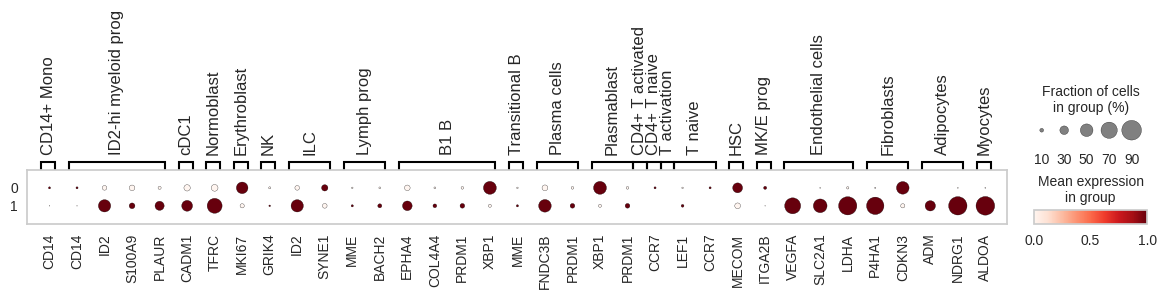

In [ ]:
cell_markers = {
    ct: [m for m in ct_markers if m in adata.var.index]
    for ct, ct_markers in marker_genes.items()
    if ct in cell_subtypes
}

sc.pl.dotplot(adata, groupby="leiden_res0_6", var_names=cell_markers, standard_scale="var") #0.75

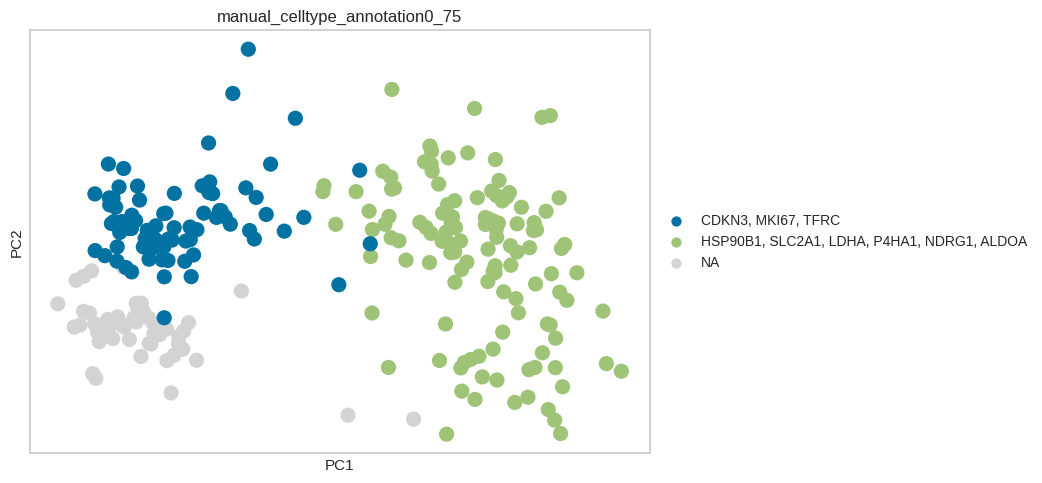

In [ ]:
cluster_annotation0_75 = {
    "0": "HSP90B1, SLC2A1, LDHA, P4HA1, NDRG1, ALDOA", 
    "1": "CDKN3, MKI67, TFRC"
}

adata.obs["manual_celltype_annotation0_75"] = adata.obs.leiden_res0_75.map(cluster_annotation0_75)

sc.pl.pca(adata, color=["manual_celltype_annotation0_75"])


# **Supervised Training**

In this section, we will actually start the training of machine learning algorithms on the MCF7 dataset. More in the specific, we will see both linear and non-linear supervised training algorithms, to then decide the ones that perform better.

## **Hyperparameter selection**

Before starting the training procedure we do hyperparameter selection on the models that require it.

The selection of hyperparameter can greatly improve the accuracy and robustness of a model, while poor choices can lead to overfitting, underfitting, or poor generalization.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Here we import all the models that we will need, that will be discussed as we go forward.

In [10]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score


### **Finding the best k for KNN**

Finding the optimal number of neighbors on which we will perform the majority vote to find the class of new instance point is fundamental, since a too low value of k can lead to mislabelling, e.g. because of outliers, and a high k may end up looking at samples that are too far away.

This process is brought on using cross-validation on the training set. We calculate the accuracy score for each k and then take the one with the highest value. A more in depth discussion about accuracy is found in the model evaluation paragraph.

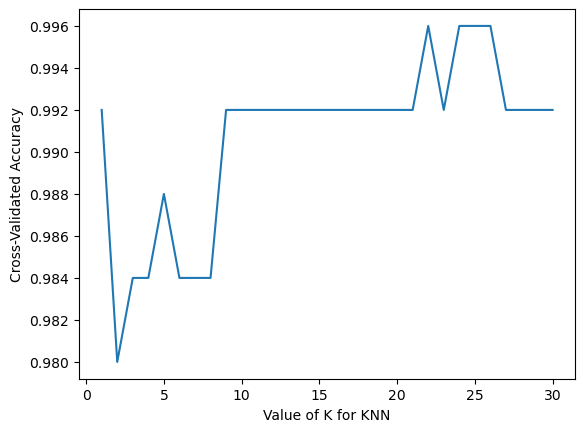

In [11]:
k_scores = []
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train, train_label, cv=10, scoring="accuracy")
    k_scores.append(scores.mean())
plt.plot(range(1, 31), k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

From the graph it is clear that the best values are somewhere between 20 and 30. As expected low values, in our case lower than 10, have lower accuracy, as too high values.

In [12]:
k = np.argmax(k_scores) + 1
k

22

The (first) highest value for k is 22.

A similar analysis on precision and recall score lead to the same optimal k

### **SGD with Grid Search**

Altough the number of hyperparamters for the SGD classifier is higher then other models that we used, we decied use to still use Grid Search cross-validation to perform hyperparamter tuning. We first tried with Randomized Search, which searches for optimality in a random manner. In this way we reduced the processing time but with the possibility of not achieving the optimal combination. On the other hand using Grid Search we look for the subset of parameters continuously, so we are sure to reach the optimal subset. 


In [ ]:
sgd = SGDClassifier(random_state=42)

In [ ]:
loss = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error']
penalty = ['l1', 'l2', 'elasticnet']
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
eta0 = [1, 10, 20, 50, 100]

param_grid_sgd = dict(loss=loss,
                           penalty=penalty,
                           alpha=alpha,
                           learning_rate=learning_rate,
                           eta0=eta0)

rs_cv = GridSearchCV(estimator=sgd, param_grid=param_grid_sgd, scoring='accuracy', verbose=1, n_jobs=-1, cv=10)
random_result = rs_cv.fit(train, train_label)

In [ ]:
print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Best Score:  1.0
Best Params:  {'alpha': 1e-05, 'eta0': 1, 'learning_rate': 'invscaling', 'loss': 'squared_hinge', 'penalty': 'l1'}


So, the best subset of parameters is achieved with *l1* regularization (Ridge), *hinge* as a loss function, a learning rate of 1 with an *optimal* learning rate schedule, i.e. eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic. Finally, *alpha*, which is the multiplier of the regularization term is set to 0.00001.

### **Logistic Regression with Grid search**

Here we follow the same procedure done with SGD

In [ ]:
logi = LogisticRegression()

In [ ]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky','sag', 'saga']

param_grid_logi = dict(penalty=penalty,
                  C=C,
                  solver=solver)

grid = GridSearchCV(estimator=logi, param_grid=param_grid_logi, scoring='accuracy', verbose=1, n_jobs=-1, cv=10)
grid_result = grid.fit(train, train_label)


Fitting 10 folds for each of 96 candidates, totalling 960 fits


/Users/mattiamartino/opt/anaconda3/envs/AILab/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mattiamartino/opt/anaconda3/envs/AILab/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mattiamartino/opt/anaconda3/envs/AILab/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mattiamartino/opt/anaconda3/envs/AILab/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mattiamartino/opt/anaconda3/envs/AILab/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  1.0
Best Params:  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


Also in this case the best accuracy score is 1.0, achieved with *l1* regularization (LASSO), and the *liblinear* solver, which runs a one-versus-rest scheme to handle multiple classes. The *C* value, inverse regularization strength, is set to 0.01.

### **SVC with Grid search CV**

We decided to perform hyperparameter selection on SVC rather than Linear SVC since from the previous plots, it seems that a linear model will perform well, and so we try to optimize the performance of the standart SVC. After model evaluation we could think about doing parameter tuning also on Linear SVC, in order to achieve better results.

In [ ]:
svc = SVC()

In [ ]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma = [0.001, 0.01, 0.1, 1, 10, 100, 1000] + ['scale', 'auto']
kernel = ['rbf', 'poly', 'linear', 'sigmoid']

param_grid = dict(gamma=gamma,
                  C=C,
                  kernel=kernel)

grid = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1, cv=10)
grid_result = grid.fit(train, train_label)

Fitting 10 folds for each of 252 candidates, totalling 2520 fits


In [ ]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.9960000000000001
Best Params:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


The best parameters for this classifier are: *C* = 0.1; *gamma* = scale, which is a parameter for non-linear hyperplanes that when set to scale it uses 1 / (n_features * train.var()). Lastly the *kernel* is set to rbf, which is the default.

It is important to notice that the class weight parameter wasn't considered, since the 50/50 distribution of labels doesn't bias the models to any particular classes. This conclusion was also drawn by initially running the hyperparameter search with the aforementioned parameter, but we noticed that it only slowed the computation since it always gave a 50-50 weight to the two labels, as our hypothesis suggested.

## **Model Pipeline**

Here we start building the pipeline, useful to automate the evaluation procedure for the selected models. All the models have adjusted hyperparameters, as a consequence of the previous tuning.

In [13]:
model_pipeline = []
model_pipeline.append(DummyClassifier())
model_pipeline.append(SGDClassifier(loss ="hinge", penalty="l1", alpha=1e-5,
                                     random_state=42, learning_rate="optimal", eta0=1))
model_pipeline.append(LogisticRegression(penalty="l1", C=0.01, solver="liblinear"))
model_pipeline.append(RandomForestClassifier(random_state=42))
model_pipeline.append(SVC(C=0.1, kernel='rbf', gamma = 'scale'))
model_pipeline.append(LinearSVC())
model_pipeline.append(KNeighborsClassifier(n_neighbors=k))

In order to try and get the best results in the classification process, we decided to select models with different characteristics.
- The Stochastic Gradient Descent Classifier, is a linear classifier model that utilizes the stochastic gradient descent algorithm for optimization. It is an efficient and scalable model suitable for large datasets with sparse and high-dimensional feature spaces. In our case we use the *hinge loss*, is used in Linear SVM and *l1 regularization*, which encourages sparsity.
- Logistic Regression models the relationship between a set of independent variables (features) and a binary dependent variable (target) using a logistic function. Also in this case we have **l1 penalty**, suggesting the importance of sparsity in our dataset.
- Random Forest Classifier is an ensemble learning algorithm that combines multiple decision trees; it is generally characterized by robustness and versatility, with the ability to handle high-dimensional datasets.
- Support Vector Classifier is based on the Support Vector Machines framework, which aims to find an optimal hyperplane that separates data points belonging to different classes with the largest possible margin. The main reason why we decided to include it is because it is especially effective when dealing with datasets that have a clear margin-based separation between classes, both when the margin is linear and when it is non-linear (thanks to a kernel change). The only complication of using SVC on large datasets is the curse of dimensionality, which makes is computationally expensive.
- Linear SVC is a variant of SVC designed to handle linearly separable data. Conversely to general SVC, it perofrms well on large datasets.
- K-Nearest-Neightbors is a non-parametric algorithm that makes predictions based on the similarity of the input data point to its k nearest neighbors in the training dataset. This algorithm is especially good at dealing with complex decision boundaries, but scales badly with dimensions.

Another model that was taken in consideration but then discarded was Gaussian Naive Bayes, which is a widely use probabilistic classifiaction model, but we decided to not use it since it assumes guassian distribution of data (which is clearly not our case, as was seen with skewness and kurtosis score).

### **Model Evaluation** 

We also consider a Dummy classifier, in order to check the perfomance with a *no-man*.

In [14]:
model_index = ["Dummy", "SGD", "Logistic", "Random Forest", "SVM", "Linear SVM", "KNN"]

In [15]:
acc_list = []
cm_list = []
prec_list_n = []
rec_list_n = []
f1_list_n = []

auc_list = []
imp_list = []


for model in model_pipeline:


  if isinstance(model, (SVC, LinearSVC, KNeighborsClassifier)):
    model.fit(train_scaled, train_label)
  else:
    model.fit(train, train_label)

  acc_scores = cross_val_score(model, train, train_label, scoring="accuracy", cv=10)
  acc_list.append(f"{acc_scores.mean().round(3)}±{acc_scores.std().round(3)}")

  label_pred = cross_val_predict(model, train, train_label, cv=10)
  cm_list.append(confusion_matrix(train_label, label_pred))


  prec_score = precision_score(train_label, label_pred, pos_label="Normoxia")
  rec_score = recall_score(train_label, label_pred, pos_label="Normoxia")
  f_score = f1_score(train_label, label_pred, pos_label="Normoxia")
  prec_list_n.append(f"{prec_score.mean().round(3)}±{prec_score.std()}")
  rec_list_n.append(f"{rec_score.mean().round(3)}±{rec_score.std().round(3)}")
  f1_list_n.append(f"{f_score.mean().round(3)}±{f_score.std().round(3)}")

  if isinstance(model, DummyClassifier):
    auc_val = None
    coef = None
  elif isinstance(model, (RandomForestClassifier, KNeighborsClassifier)):
    scores = cross_val_predict(model, train, train_label, cv=10, method="predict_proba")[:, 1]
    auc_val = roc_auc_score(train_label, scores).round(3)

    if isinstance(model, RandomForestClassifier):
      coef = np.array(model.feature_importances_).ravel()
    else:
      coef = None

  elif isinstance(model, SVC):
    coef = None

  else:
    scores = cross_val_predict(model, train, train_label, cv=10, method='decision_function')
    auc_val = roc_auc_score(train_label, scores).round(3)
    coef = np.array(model.coef_).ravel()

  auc_list.append(auc_val)

  # This part is needed afterwards, for gene annotation.

  importance = {}
  features = np.array(train.columns)
  if coef is not None:
    for i, c in enumerate(coef):
      importance[features[i]] = c

    largest_items = sorted(importance.items(), key=lambda x: x[1], reverse=True)[:30]
    largest_keys = [item[0] for item in largest_items]
    largest_values = [item[1] for item in largest_items]

    largest = {largest_keys[i]:largest_values[i] for i in range(len(largest_keys))}
    largest = {k:v for k, v in largest.items() if v != 0}

    imp_list.append(largest)
  else:
    imp_list.append(None)


  print(f"{model} evaluation completed!")

print("\nAll models have been evaluated!")


DummyClassifier() evaluation completed!
SGDClassifier(alpha=1e-05, eta0=1, penalty='l1', random_state=42) evaluation completed!
LogisticRegression(C=0.01, penalty='l1', solver='liblinear') evaluation completed!
RandomForestClassifier(random_state=42) evaluation completed!
SVC(C=0.1) evaluation completed!
LinearSVC() evaluation completed!
KNeighborsClassifier(n_neighbors=22) evaluation completed!

All models have been evaluated!


In this part we collect all the different score that we need in order to decide which is effectively the best model for our dataset. The reason why we don't use only the accuracy score is because in precence of skewed data this score can be misleading; for this reason we also consider precision recall and the f1 score, together with the ROC AUC score. Notice that for the models that require it, we train them on scaled data.

The last part of the `for` loop, we create the `importance` list, which contanins the most relevant features for every model.

### **Confusion Matrix visualization**

An handy way to visualize the performance of our models is the confusion matrix. Checking the confusion matrix is helpful because it provides a detailed breakdown of the model's predictions and helps identify specific areas for improvement. 

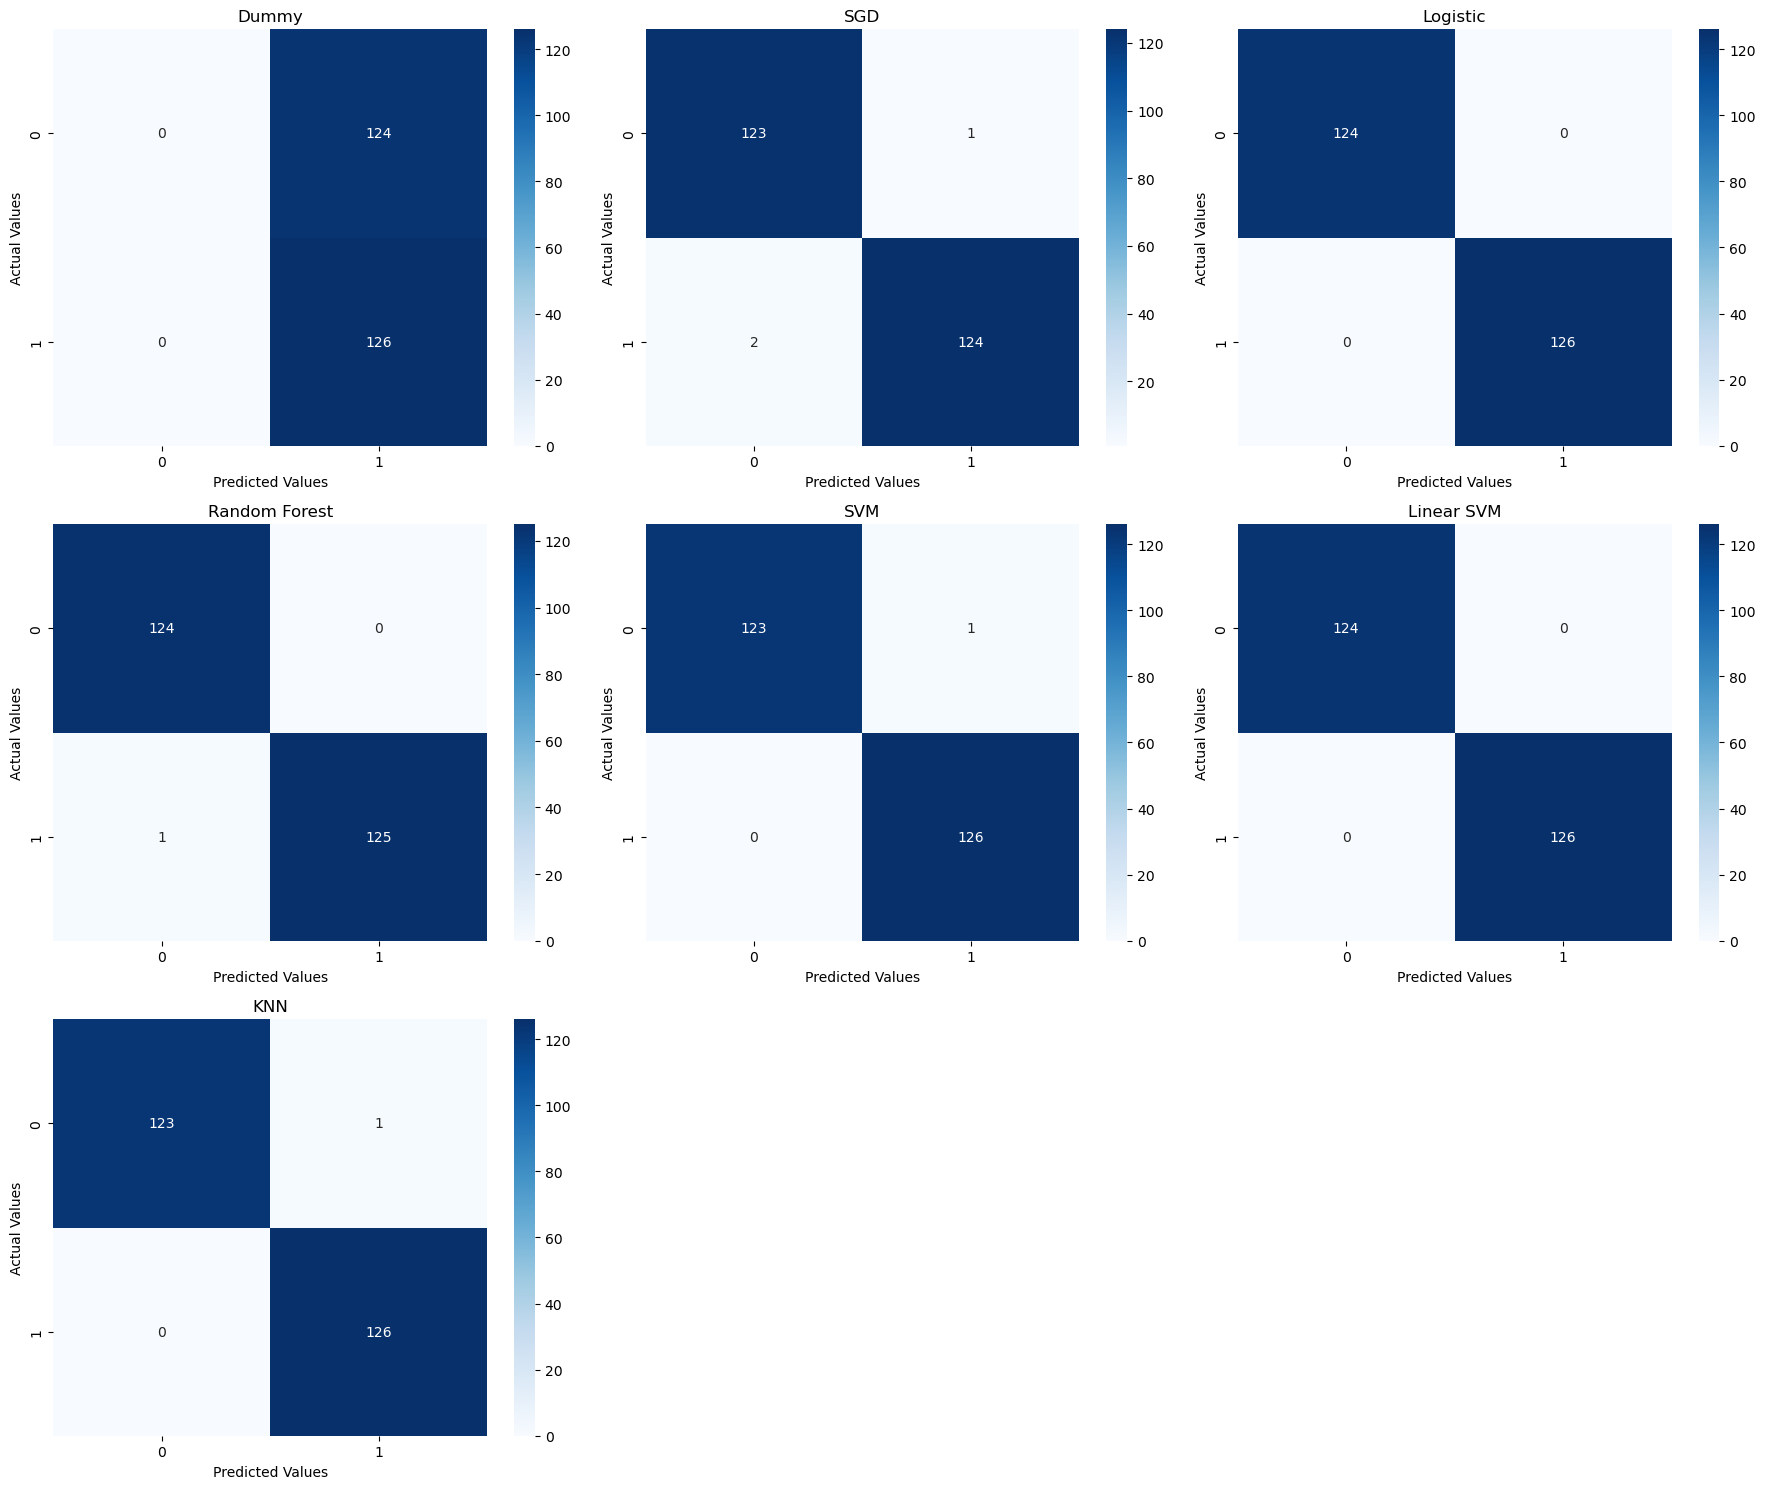

In [16]:
fig = plt.figure(figsize=(18, 15))

num_plots = len(cm_list)
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 3)

for i in range(num_plots):
    cm, model = cm_list[i], model_index[i]
    ax = fig.add_subplot(num_rows, num_cols, i+1)
    ax.set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', ax=ax)
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

plt.tight_layout()
plt.show()
  

### **Result Dataframe**

In [17]:
results_df = pd.DataFrame({"Model":model_index, "Accuracy": acc_list, "Precision (Normoxia)": prec_list_n,
                           "Recall (Normoxia)": rec_list_n,
                           "F1 (Normoxia)": f1_list_n, "Auc": auc_list})
results_df

,Model,Accuracy,Precision (Normoxia),Recall (Normoxia),F1 (Normoxia),Auc
0,Dummy,0.504±0.02,0.504±0.0,1.0±0.0,0.67±0.0,NaN
1,SGD,0.988±0.026,0.992±0.0,0.984±0.0,0.988±0.0,1.0
2,Logistic,1.0±0.0,1.0±0.0,1.0±0.0,1.0±0.0,1.0
3,Random Forest,0.996±0.012,1.0±0.0,0.992±0.0,0.996±0.0,1.0
4,SVM,0.996±0.012,0.992±0.0,1.0±0.0,0.996±0.0,1.0
5,Linear SVM,1.0±0.0,1.0±0.0,1.0±0.0,1.0±0.0,1.0
6,KNN,0.996±0.012,0.992±0.0,1.0±0.0,0.996±0.0,1.0


The result should be read as: mean value of the scores calculated with 10-fold cross-validation ± standard deviation of the scores.

From this result table we can see that the Linear SVM and the Logistic Regression are perfect classifiers, while KNN and SDG are the ones that perform worst (nonetheless they have really high precision scores).

With comparison also with the HCC1806 cell line, we see that Logistic Regression seems to be the model that behaves the best

### **Most Relevant Genes**

In [ ]:
from collections import defaultdict

def most_common_keys(dict_list, num_keys=5):
    keys_list = []
    for d in dict_list:
        keys_list.extend(d.keys())

    key_count = defaultdict(int)

    for key in keys_list:
        key_count[key] += 1

    sorted_keys = sorted(key_count, key=key_count.get, reverse=True)

    return sorted_keys[:num_keys]

In [ ]:
imp_list = [x for x in imp_list if x]
imp_list

In [ ]:
most_common_keys(imp_list, 100)

['MT-CYB',
 'MT-CO1',
 'MT-CO2',
 'CTSD',
 'SCD',
 'MT-CO3',
 'XBP1',
 'SULF2',
 'GATA3',
 'MT-ATP6',
 'SLC9A3R1',
 'EMP2',
 'GFRA1',
 'HSPB1',
 'DHCR7',
 'TMEM64',
 'FOS',
 'DDX5',
 'NME1-NME2',
 'CLDN4',
 'TMSB4X',
 'IFI6',
 'NR4A1',
 'IFITM3',
 'DSCAM-AS1',
 'THBS1',
 'MT-RNR2',
 'TUBA1B',
 'HSPA8',
 'MT-ND4',
 'TUBB4B',
 'LMNA',
 'MT-ND5',
 'MCM7',
 'DYNC2I2',
 'UBB',
 'GPI',
 'ARPC1B',
 'BNIP3',
 'FAM162A',
 'CYP1B1',
 'P4HA1',
 'SRM',
 'ENO2',
 'HK2',
 'PFKFB4',
 'ERO1A',
 'SLC9A3R1-AS1',
 'PSME2',
 'IRF2BP2',
 'DCXR',
 'DDIT4',
 'PFKP',
 'KPNA2',
 'ALDOA',
 'PGK1',
 'NECAB1',
 'KRT80',
 'RHOD',
 'ISOC1',
 'CYP1B1-AS1',
 'NDRG1',
 'GAPDH',
 'CEACAM5',
 'ISG15',
 'PLK2',
 'DKK1',
 'MAGED2',
 'STARD10',
 'MLPH',
 'NCOA3',
 'COX6C',
 'HNRNPA2B1',
 'SLC39A6',
 'CRABP2',
 'HSPA5']

## **Pathway Analysis**

As before, now we want to perform over-representation analysis.

In [ ]:
!sudo apt install libcairo2-dev pkg-config python3-dev -y &> /dev/null
#kegg
!pip install -q biopython
!pip install -q pycairo
!pip install -q ReportLab
#gseapy
!pip install -q gseapy

#library needed for kegg
from IPython.display import Image     # Show images inline
import io                             # Standard library packages
import os
from Bio import SeqIO                 # Import Biopython modules to interact with KEGG
from Bio.KEGG import REST
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas
#gseapy
import gseapy as gp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.6/344.6 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.9/978.9 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.7 MB/s eta 0:00:00


In [ ]:
#import dataset
m_train = pd.read_csv("./MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt", sep=' ')
# m_train.set_index('Unnamed: 0', inplace = True)

In [ ]:
#define gene_list, gene_sets, gene_background
gene_list = ['MT-CYB', 'MT-CO3', 'MT-CO1', 'MT-CO2', 'CTSD', 'SCD', 'XBP1', 'SULF2', 'GATA3', 'MT-ATP6', 'SLC9A3R1', 'EMP2', 'GFRA1', 'HSPB1', 'DHCR7', 'TMEM64', 'FOS', 'DDX5', 'NME1-NME2', 'CLDN4', 'TMSB4X', 'IFI6', 'NR4A1', 'IFITM3', 'DSCAM-AS1', 'THBS1', 'MT-RNR2', 'TUBA1B', 'HSPA8', 'MT-ND4', 'TUBB4B', 'LMNA', 'MT-ND5', 'MCM7', 'DYNC2I2', 'UBB', 'GPI', 'ARPC1B', 'BNIP3', 'FAM162A', 'CYP1B1', 'P4HA1', 'SRM', 'ENO2', 'HK2', 'PFKFB4', 'ERO1A', 'SLC9A3R1-AS1', 'PSME2', 'IRF2BP2', 'DCXR', 'DDIT4', 'PFKP', 'KPNA2', 'ALDOA', 'PGK1', 'NECAB1', 'KRT80', 'RHOD', 'ISOC1', 'CYP1B1-AS1', 'NDRG1', 'GAPDH', 'CEACAM5', 'ISG15', 'PLK2', 'DKK1', 'MAGED2', 'STARD10', 'MLPH', 'NCOA3', 'COX6C', 'HNRNPA2B1', 'SLC39A6', 'CRABP2', 'HSPA5']
gene_background = None
gene_sets = ['MSigDB_Hallmark_2020','KEGG_2021_Human']              #https://maayanlab.cloud/Enrichr/#libraries to have more gene_sets

In [ ]:
#RUN THIS CODE IF YOU WANT TO PERFORM THE ANALYSIS WITH CUSTOM BACKGROUND GENES
# kegg_hum = gp.get_library(name='KEGG_2021_Human', organism='Human')
# msi_hall = gp.get_library(name='MSigDB_Hallmark_2020', organism='Human')

# kegg_hum.update(msi_hall)

# gene_sets = kegg_hum

# gene_background = pd.read_csv(path_m_unfiltered, sep = " ").index.to_list()

In [ ]:
enr = gp.enrichr(gene_list=gene_list, 
                 gene_sets=gene_sets, 
                 organism='human', 
                 background=gene_background,
                 outdir=None, 
                )

In [ ]:
enr.results[enr.results['Gene_set'] == 'MSigDB_Hallmark_2020'].head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Hypoxia,14/200,2.521916e-14,9.078899e-13,0,0,23.962192,750.284326,ERO1A;GPI;HSPA5;FOS;ENO2;NDRG1;HK2;P4HA1;FAM16...
1,MSigDB_Hallmark_2020,mTORC1 Signaling,13/200,5.938435e-13,1.068918e-11,0,0,21.779221,613.132121,ERO1A;GPI;XBP1;HSPA5;HK2;SLC9A3R1;P4HA1;SCD;DD...
2,MSigDB_Hallmark_2020,Glycolysis,10/200,4.294112e-09,5.152934e-08,0,0,15.736842,303.186332,ERO1A;HSPA5;P4HA1;FAM162A;DDIT4;PGK1;ALDOA;ENO...
3,MSigDB_Hallmark_2020,Estrogen Response Early,8/200,9.158286e-07,8.242457e-06,0,0,12.090686,168.102090,SLC9A3R1;XBP1;MLPH;SLC39A6;GFRA1;DHCR7;FOS;RHOD
4,MSigDB_Hallmark_2020,Estrogen Response Late,7/200,1.098130e-05,6.588778e-05,0,0,10.371480,118.435220,SLC9A3R1;XBP1;DCXR;EMP2;DHCR7;FOS;COX6C


In [ ]:
enr.results[enr.results['Gene_set'] == 'KEGG_2021_Human'].head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
36,KEGG_2021_Human,Glycolysis / Gluconeogenesis,7/67,6.249350e-09,8.811583e-07,0,0,33.586473,634.474963,GPI;PGK1;ENO2;ALDOA;GAPDH;HK2;PFKP
37,KEGG_2021_Human,HIF-1 signaling pathway,6/109,3.658174e-06,2.579013e-04,0,0,16.494591,206.488302,PGK1;ALDOA;ENO2;GAPDH;HK2;PFKP
38,KEGG_2021_Human,Fructose and mannose metabolism,4/33,7.245268e-06,3.405276e-04,0,0,38.113027,451.073847,PFKFB4;ALDOA;HK2;PFKP
39,KEGG_2021_Human,Pathogenic Escherichia coli infection,7/197,9.952496e-06,3.508255e-04,0,0,10.536842,121.360052,SLC9A3R1;CLDN4;TUBA1B;ARPC1B;FOS;TUBB4B;GAPDH
40,KEGG_2021_Human,Pentose phosphate pathway,3/30,1.988401e-04,5.607291e-03,0,0,30.284627,258.116167,GPI;ALDOA;PFKP


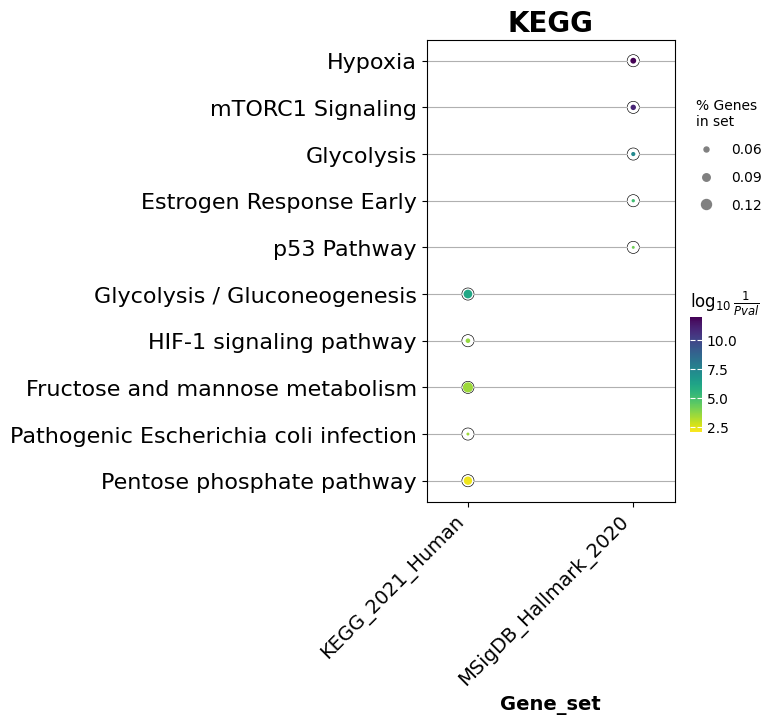

In [ ]:
#Show top 5 terms of each gene_set ranked by “Adjusted P-value”
from gseapy import barplot, dotplot

ax = dotplot(enr.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(4,6),
              title = "KEGG",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

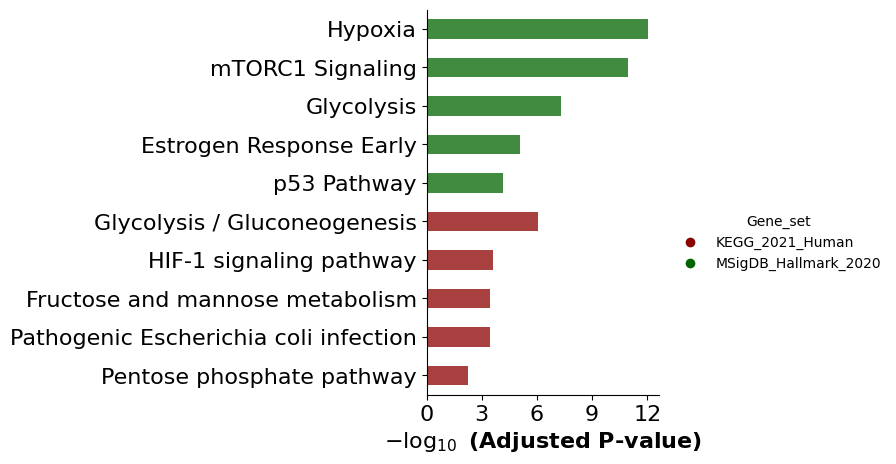

In [ ]:
# categorical scatterplot
ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              color=['darkred', 'darkgreen'] # set colors for group
             )

Now we want to try and understand if the results make sense. In order to do so, as before, let's see what the gene sets are and let's visualize, if possible, some of them. 

In particular, let's see the most important ones. We immediately see that the gene sets that are over-represented are the ones corresponding to:
- Hypoxia. 
- mTORC1 Signaling.
- Glycolysis.
- Estrogen response early: People have shown that that hypoxia-inducible factor  (HIF-1α) is a direct transcriptional target of estrogen.
- p53 pathway: The p53 pathway is composed of hundreds of genes and their products that respond to a wide variety of stress signals. These responses to stress include apoptosis, cellular senescence or cell cycle arrest. Hypoxia is known to modulate the p53 pathway.

Now let's pass to the gene sets in KEGG. Notice that here many gene sets are repeated. In particular, we can find again glycolysis, hypoxia (HIF-1 signaling pathway; HIF-1 is the main hypoxia-inducible factor). The others we weren't able to properly analyse them.

Notice that Hypoxia, mTORC1 signaling and glycolysis were also found in the HCC1806 cell line.

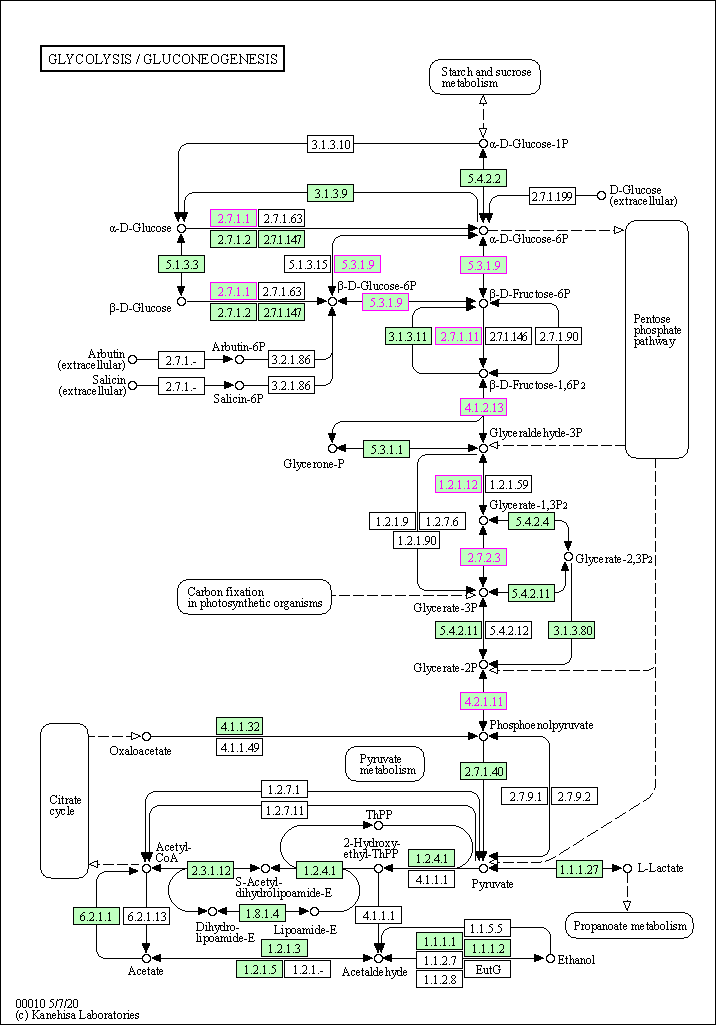

In [ ]:
from IPython.display import Image, display

display(Image(filename='./hsa00010 M.png', width = 600))

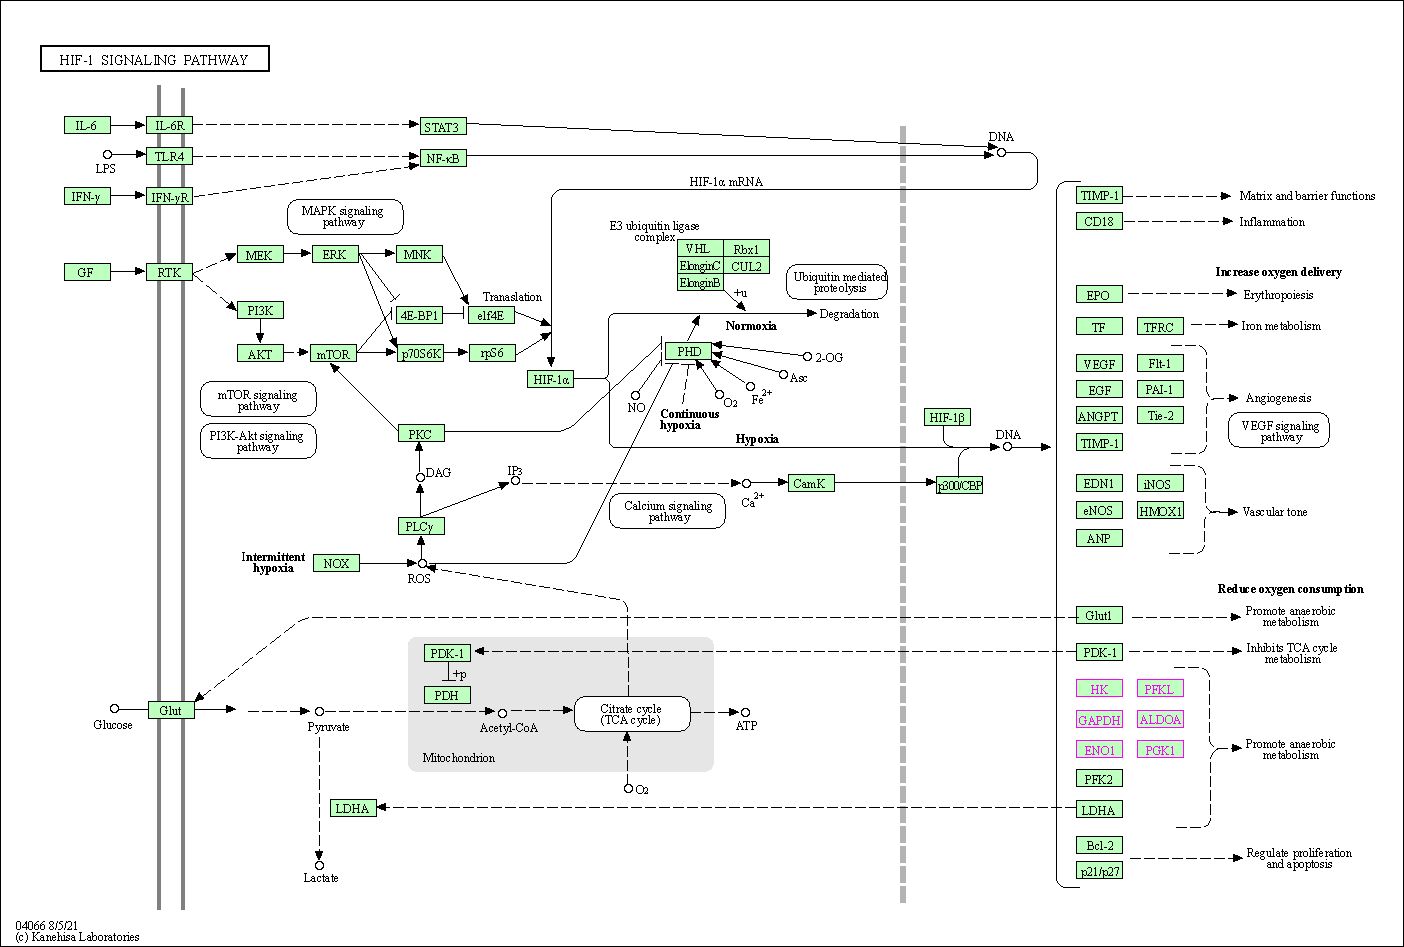

In [ ]:
display(Image(filename='./hsa04066 M.png', height = 600))

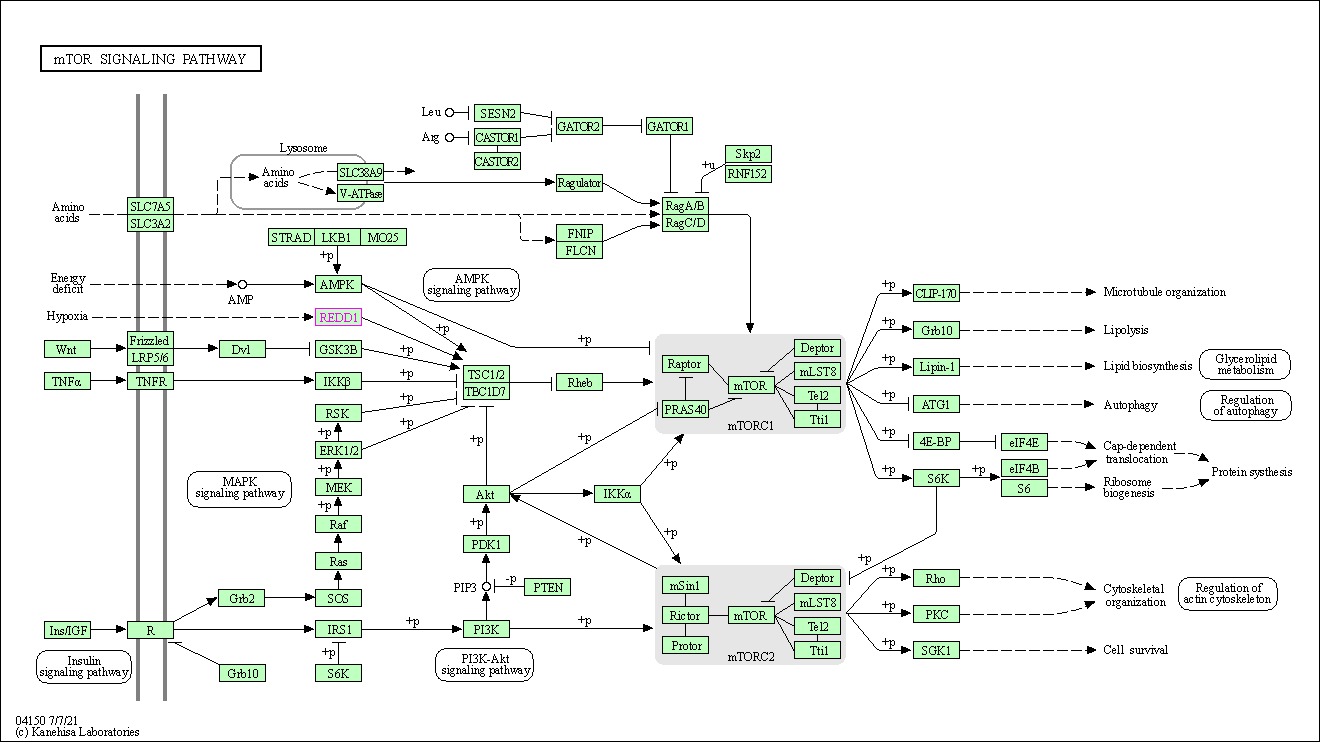

In [ ]:
display(Image(filename='./hsa04150 M.png', height = 600))

# Test

In [27]:
test = pd.read_csv("./MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt", sep =" ").transpose()

In [28]:
test

,CYP1B1,CYP1B1-AS1,CYP1A1,NDRG1,DDIT4,PFKFB3,HK2,AREG,MYBL2,ADM,...,CD27-AS1,DNAI7,MAFG,LZTR1,BCO2,GRIK5,SLC25A27,DENND5A,CDK5R1,FAM13A-AS1
1,492,253,0,1157,6805,5447,2662,2448,0,58,...,0,0,193,0,0,0,0,285,0,1
2,7199,3245,7181,1857,20731,4374,5490,0,0,2150,...,0,0,187,0,0,0,0,55,0,0
3,12,11,1,5,147,301,9,647,1890,1,...,0,0,28,0,0,0,0,1,0,0
4,373,187,0,0,43,37,0,0,580,0,...,21,0,131,0,0,0,0,3,0,0
5,31,13,0,0,0,44,8,0,554,0,...,43,0,30,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,287,126,666,3270,25776,12144,1119,0,0,678,...,0,0,473,0,0,0,0,315,0,26
60,15220,6316,1991,750,12176,7488,3172,2030,0,64,...,0,0,36,0,0,0,34,78,0,0
61,21998,8898,21329,1498,5144,1146,914,0,0,0,...,69,0,0,0,0,0,0,0,0,35
62,39,17,1,29,20,0,0,88,1399,0,...,12,0,0,0,0,0,0,0,0,0


In [23]:
logc = LogisticRegression(penalty="l1", C=0.01, solver="liblinear")

In [24]:
logc.fit(train, train_label)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [29]:
pred_logc = logc.predict(test)

In [30]:
lsvc = LinearSVC()

In [31]:
lsvc.fit(train, train_label)
pred_lsvc = lsvc.predict(test)

In [32]:
pred_logc == pred_lsvc

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])